# Importing Libraries

In [383]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import scatter_matrix
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Flatten,Dense

# Loading Dataset

In [384]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

In [385]:
X_train.shape, y_train.shape,X_test.shape, y_test.shape

((50000, 32, 32, 3), (50000, 1), (10000, 32, 32, 3), (10000, 1))

# data Exploration

In [386]:
y_train = y_train.reshape(-1,)
y_test = y_test.reshape(-1,)
y_train

array([6, 9, 9, ..., 9, 1, 1], dtype=uint8)

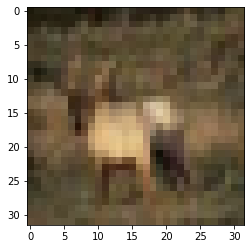

In [387]:
plt.imshow(X_train[3])

In [388]:
y_train[3]

4

In [389]:
labels = {'Airplane':0, 'Automobile':1, 'Bird':2, 'Cat':3, 'Deer':4, 'Dog':5, 'Frog':6, 'Horse':7, 'Ship':8,'Truck':9}

In [390]:
pd.DataFrame(y_train).value_counts()

0    5000
1    5000
2    5000
3    5000
4    5000
5    5000
6    5000
7    5000
8    5000
9    5000
dtype: int64

In [527]:
pd.DataFrame(y_test).value_counts()

0    1000
1    1000
2    1000
3    1000
4    1000
5    1000
6    1000
7    1000
8    1000
9    1000
dtype: int64

# Normalising data

In [391]:
X_train = X_train / 255.0
X_test = X_test / 255.0

# Model Building

## Using ANN

In [392]:
import keras
from tensorflow.keras import Sequential
from tensorflow.keras import models,layers

In [393]:
ann0 = models.Sequential([
        layers.Flatten(input_shape=(32,32,3)),
        layers.Dense(3000, activation='relu'),
        layers.Dense(1000, activation='relu'),
        layers.Dense(10, activation='softmax')    
    ])

ann0.compile(optimizer='SGD',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

ann0.fit(X_train, y_train, epochs = 5, batch_size=64, validation_data=(X_test, y_test), verbose= 1)

Epoch 1/5
782/782 [==============================] - 35s 40ms/step - loss: 1.8601 - accuracy: 0.3370 - val_loss: 1.8276 - val_accuracy: 0.3398
Epoch 2/5
782/782 [==============================] - 30s 39ms/step - loss: 1.6849 - accuracy: 0.4059 - val_loss: 2.1339 - val_accuracy: 0.2467
Epoch 3/5
782/782 [==============================] - 30s 38ms/step - loss: 1.6048 - accuracy: 0.4353 - val_loss: 1.6785 - val_accuracy: 0.4020
Epoch 4/5
782/782 [==============================] - 31s 39ms/step - loss: 1.5497 - accuracy: 0.4577 - val_loss: 1.5721 - val_accuracy: 0.4431
Epoch 5/5
782/782 [==============================] - 32s 41ms/step - loss: 1.5061 - accuracy: 0.4719 - val_loss: 1.8399 - val_accuracy: 0.3540


In [394]:
pre = ann0.predict(X_test)
pred = np.argmax(pre,axis=1)
pred

313/313 [==============================] - 2s 7ms/step


array([8, 8, 8, ..., 5, 5, 8], dtype=int64)

In [395]:
accuracy_score(pred,y_test)

0.354

In [396]:
confusion_matrix(pred,y_test)

array([[ 68,   2,  10,   4,  10,   1,   0,   2,   3,   3],
       [ 23, 455,  29,  38,  19,  28,  29,  30,  33, 162],
       [  6,   2,  39,   2,   7,  12,   6,   9,   0,   1],
       [ 26,  19,  93, 279,  58, 155, 108,  74,   8,  18],
       [ 19,   5, 150,  24, 352,  45,  85,  66,   2,   7],
       [ 37,  23, 196, 264, 130, 413, 104, 156,  11,  24],
       [ 17,  10, 111,  71, 118,  52, 470,  31,   5,  21],
       [  5,  13,  30,  12,  40,  29,  19, 309,   1,  12],
       [785, 416, 336, 276, 261, 252, 169, 284, 928, 525],
       [ 14,  55,   6,  30,   5,  13,  10,  39,   9, 227]], dtype=int64)

In [397]:
results = pd.DataFrame(columns=['Model','Acc.Test'])

In [398]:
m = pd.Series({'Model':'FFN optimizer=SGD','Acc.Test':accuracy_score(pred,y_test)})
results=results.append(m,ignore_index=True)

C:\Users\40027784\AppData\Local\Temp\ipykernel_16368\1466870999.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results=results.append(m,ignore_index=True)


In [399]:
ann1 = models.Sequential([
        layers.Flatten(input_shape=(32,32,3)),
        layers.Dense(3000, activation='relu'),
        layers.Dense(1000, activation='relu'),
        layers.Dense(10, activation='softmax')    
    ])

ann1.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

ann1.fit(X_train, y_train, epochs = 5, batch_size=64, validation_data=(X_test, y_test), verbose= 1)

Epoch 1/5
782/782 [==============================] - 50s 63ms/step - loss: 1.9078 - accuracy: 0.3251 - val_loss: 1.7171 - val_accuracy: 0.3852
Epoch 2/5
782/782 [==============================] - 47s 60ms/step - loss: 1.6582 - accuracy: 0.4061 - val_loss: 1.6189 - val_accuracy: 0.4212
Epoch 3/5
782/782 [==============================] - 47s 60ms/step - loss: 1.5690 - accuracy: 0.4382 - val_loss: 1.5780 - val_accuracy: 0.4311
Epoch 4/5
782/782 [==============================] - 47s 60ms/step - loss: 1.5181 - accuracy: 0.4589 - val_loss: 1.4952 - val_accuracy: 0.4631
Epoch 5/5
782/782 [==============================] - 49s 62ms/step - loss: 1.4697 - accuracy: 0.4734 - val_loss: 1.4761 - val_accuracy: 0.4736


In [400]:
pre1 = ann1.predict(X_test)
pred1 = np.argmax(pre1,axis=1)
pred1

313/313 [==============================] - 2s 7ms/step


array([3, 9, 9, ..., 5, 2, 7], dtype=int64)

In [401]:
accuracy_score(pred1,y_test)

0.4736

In [402]:
confusion_matrix(pred1,y_test)

array([[529,  61,  66,  36,  56,  27,  10,  29, 118,  44],
       [ 30, 575,  21,  28,  10,  12,  15,  13,  98, 148],
       [ 71,  10, 338,  89, 146,  86,  79,  59,  18,   7],
       [ 16,  22,  82, 222,  42, 137,  56,  51,  11,  17],
       [ 36,  10, 147,  53, 382,  40, 152,  64,  24,  16],
       [ 33,  37, 106, 271,  73, 435,  76,  87,  39,  38],
       [ 15,  15,  85, 129, 103,  81, 515,  22,   9,  25],
       [ 91,  49, 124,  96, 150, 130,  64, 636,  45, 106],
       [102,  29,  13,  24,  25,  26,  10,   7, 546,  41],
       [ 77, 192,  18,  52,  13,  26,  23,  32,  92, 558]], dtype=int64)

In [403]:
m = pd.Series({'Model':'FFN optimizer=adam','Acc.Test':accuracy_score(pred1,y_test)})
results=results.append(m,ignore_index=True)

C:\Users\40027784\AppData\Local\Temp\ipykernel_16368\3841209414.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results=results.append(m,ignore_index=True)


In [404]:
ann2 = models.Sequential([
        layers.Flatten(input_shape=(32,32,3)),
        layers.Dense(3000, activation='relu'),
        layers.Dense(1000, activation='relu'),
        layers.Dense(10, activation='softmax')    
    ])

ann2.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

ann2.fit(X_train, y_train, epochs = 5, batch_size=64, validation_data=(X_test, y_test), verbose= 1)

Epoch 1/5
782/782 [==============================] - 49s 61ms/step - loss: 1.9423 - accuracy: 0.3225 - val_loss: 1.7225 - val_accuracy: 0.3785
Epoch 2/5
782/782 [==============================] - 47s 61ms/step - loss: 1.6526 - accuracy: 0.4048 - val_loss: 1.5894 - val_accuracy: 0.4345
Epoch 3/5
782/782 [==============================] - 47s 61ms/step - loss: 1.5726 - accuracy: 0.4358 - val_loss: 1.5315 - val_accuracy: 0.4526
Epoch 4/5
782/782 [==============================] - 48s 61ms/step - loss: 1.5101 - accuracy: 0.4608 - val_loss: 1.5379 - val_accuracy: 0.4505
Epoch 5/5
782/782 [==============================] - 48s 61ms/step - loss: 1.4701 - accuracy: 0.4768 - val_loss: 1.4824 - val_accuracy: 0.4714


In [405]:
pre2 = ann2.predict(X_test)
pred2 = np.argmax(pre2,axis=1)
pred2

313/313 [==============================] - 2s 7ms/step


array([3, 8, 8, ..., 3, 2, 7], dtype=int64)

In [406]:
accuracy_score(pred2,y_test)

0.4714

In [407]:
confusion_matrix(pred2,y_test)

array([[520,  38,  92,  25,  65,  27,  12,  73,  92,  50],
       [ 61, 671,  43,  33,  19,  28,  29,  33,  83, 236],
       [ 43,  11, 314,  64, 146,  90,  67,  59,   8,   6],
       [ 81,  39, 173, 500, 142, 289, 256, 154,  63,  67],
       [ 13,   8, 139,  42, 372,  50, 147,  49,  11,   7],
       [ 20,  14,  71, 191,  58, 359,  72,  65,  21,  18],
       [ 15,   7,  66,  46,  66,  49, 364,  24,   2,  11],
       [ 18,  17,  51,  28,  78,  52,  16, 468,   6,  22],
       [184,  69,  39,  26,  37,  31,  16,  20, 655,  92],
       [ 45, 126,  12,  45,  17,  25,  21,  55,  59, 491]], dtype=int64)

In [408]:
m = pd.Series({'Model':'FFN optimizer=adam,epochs=10','Acc.Test':accuracy_score(pred2,y_test)})
results=results.append(m,ignore_index=True)

C:\Users\40027784\AppData\Local\Temp\ipykernel_16368\3579532388.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results=results.append(m,ignore_index=True)


In [409]:
results

,Model,Acc.Test
0,FFN optimizer=SGD,0.3540
1,FFN optimizer=adam,0.4736
2,"FFN optimizer=adam,epochs=10",0.4714


## CNN

In [410]:
cnn3 = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3),activation="relu",input_shape=(32,32,3)),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(filters=64, kernel_size=(3, 3),activation="relu"),
    layers.MaxPooling2D((2, 2)),
    
#     layers.Conv2D(filters=128, kernel_size=(3, 3),activation="relu"),
#     layers.MaxPooling2D((2, 2)),
    
#     layers.Conv2D(filters=256, kernel_size=(3, 3),activation="relu"),
#     layers.MaxPooling2D((2, 2)),
    
    layers.Flatten(),
    layers.Dense(64,activation="relu"),
    layers.Dense(10,activation="softmax")
    
    
    
    
])

In [411]:
cnn3.compile(
   optimizer="adam",
   loss="sparse_categorical_crossentropy",
   metrics=["accuracy"]

)
cnn3.fit(X_train, y_train, epochs = 5, batch_size=64, validation_data=(X_test, y_test), verbose= 1)

Epoch 1/5
782/782 [==============================] - 26s 32ms/step - loss: 1.5538 - accuracy: 0.4381 - val_loss: 1.3487 - val_accuracy: 0.5212
Epoch 2/5
782/782 [==============================] - 25s 32ms/step - loss: 1.1976 - accuracy: 0.5798 - val_loss: 1.1305 - val_accuracy: 0.6058
Epoch 3/5
782/782 [==============================] - 24s 31ms/step - loss: 1.0556 - accuracy: 0.6329 - val_loss: 1.0706 - val_accuracy: 0.6300
Epoch 4/5
782/782 [==============================] - 24s 30ms/step - loss: 0.9725 - accuracy: 0.6596 - val_loss: 0.9836 - val_accuracy: 0.6614
Epoch 5/5
782/782 [==============================] - 24s 31ms/step - loss: 0.9095 - accuracy: 0.6851 - val_loss: 0.9783 - val_accuracy: 0.6587


In [412]:
result = cnn3.predict(X_test)
res = np.argmax(result,axis=1)
res

313/313 [==============================] - 1s 4ms/step


array([3, 8, 8, ..., 5, 4, 7], dtype=int64)

In [413]:
accuracy_score(res,y_test)

0.6587

In [414]:
confusion_matrix(res,y_test)

array([[561,  12,  61,  13,  13,   6,   3,  11,  20,  10],
       [ 24, 718,   9,  10,   4,   5,   9,   5,  22,  70],
       [ 41,   4, 480,  55,  75,  40,  35,  27,  10,   9],
       [ 48,  12, 129, 590, 121, 239, 109,  62,  15,  27],
       [ 17,   5, 100,  63, 581,  49,  54,  57,   3,   3],
       [  4,   6,  68, 137,  29, 552,  26,  61,   4,   6],
       [  5,   6,  58,  42,  54,  12, 708,   5,   2,   8],
       [ 11,   2,  33,  36,  81,  63,  19, 723,   5,  13],
       [244,  86,  42,  31,  32,  21,  16,  15, 886,  66],
       [ 45, 149,  20,  23,  10,  13,  21,  34,  33, 788]], dtype=int64)

In [415]:
m = pd.Series({'Model':'CNN 2layer epoch=5','Acc.Test':accuracy_score(res,y_test)})
results = results.append(m,ignore_index=True)

C:\Users\40027784\AppData\Local\Temp\ipykernel_16368\1200534298.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results=results.append(m,ignore_index=True)


In [416]:
cnn4 = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3),activation="relu",input_shape=(32,32,3)),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(filters=64, kernel_size=(3, 3),activation="relu"),
    layers.MaxPooling2D((2, 2)),
    
    # layers.Conv2D(filters=128, kernel_size=(3, 3),activation="relu"),
    # layers.MaxPooling2D((2, 2)),
    
#     layers.Conv2D(filters=128, kernel_size=(3, 3),activation="relu"),
#     layers.MaxPooling2D((2, 2)),
    
    layers.Flatten(),
    layers.Dense(64,activation="relu"),
    layers.Dense(10,activation="softmax")
])

In [417]:
cnn4.compile(
   optimizer="adam",
   loss="sparse_categorical_crossentropy",
   metrics=["accuracy"]

)
cnn4.fit(X_train, y_train, epochs = 20, batch_size=64, validation_data=(X_test, y_test), verbose= 1)

Epoch 1/20
782/782 [==============================] - 23s 29ms/step - loss: 1.5162 - accuracy: 0.4553 - val_loss: 1.2806 - val_accuracy: 0.5435
Epoch 2/20
782/782 [==============================] - 23s 30ms/step - loss: 1.1645 - accuracy: 0.5938 - val_loss: 1.1409 - val_accuracy: 0.6013
Epoch 3/20
782/782 [==============================] - 23s 29ms/step - loss: 1.0315 - accuracy: 0.6415 - val_loss: 1.0223 - val_accuracy: 0.6430
Epoch 4/20
782/782 [==============================] - 23s 29ms/step - loss: 0.9561 - accuracy: 0.6691 - val_loss: 0.9822 - val_accuracy: 0.6610
Epoch 5/20
782/782 [==============================] - 23s 29ms/step - loss: 0.8963 - accuracy: 0.6895 - val_loss: 0.9654 - val_accuracy: 0.6646
Epoch 6/20
782/782 [==============================] - 22s 29ms/step - loss: 0.8495 - accuracy: 0.7041 - val_loss: 0.9072 - val_accuracy: 0.6900
Epoch 7/20
782/782 [==============================] - 22s 29ms/step - loss: 0.8040 - accuracy: 0.7222 - val_loss: 0.9255 - val_accuracy:

In [418]:
result1 = cnn4.predict(X_test)
res1 = np.argmax(result1,axis=1)
res1

313/313 [==============================] - 1s 4ms/step


array([3, 8, 8, ..., 5, 4, 7], dtype=int64)

In [419]:
accuracy_score(res1,y_test)

0.6918

In [420]:
confusion_matrix(res1,y_test)

array([[788,  39,  91,  43,  24,  17,   7,  24, 102,  44],
       [ 16, 804,   3,  11,   4,   0,   1,   2,  39,  87],
       [ 38,  14, 552,  60,  71,  34,  58,  40,  12,  12],
       [ 14,  11,  60, 453,  51, 139,  85,  43,  12,  17],
       [ 18,   8, 101,  77, 680,  47,  61,  62,  16,  14],
       [ 24,   8, 107, 255,  68, 698,  49,  99,  14,  23],
       [  8,   6,  35,  43,  31,   9, 718,   3,   8,   6],
       [ 12,   7,  33,  43,  60,  43,  10, 715,   7,  22],
       [ 52,  23,   8,   8,   8,   7,   7,   1, 759,  24],
       [ 30,  80,  10,   7,   3,   6,   4,  11,  31, 751]], dtype=int64)

In [421]:
m = pd.Series({'Model':'CNN 2layer,epochs=20','Acc.Test':accuracy_score(res1,y_test)})
results = results.append(m,ignore_index=True)

C:\Users\40027784\AppData\Local\Temp\ipykernel_16368\1937322380.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results=results.append(m,ignore_index=True)


In [422]:
cnn5 = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3),activation="relu",input_shape=(32,32,3)),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(filters=64, kernel_size=(3, 3),activation="relu"),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(filters=128, kernel_size=(3, 3),activation="relu"),
    layers.MaxPooling2D((2, 2)),
    
#     layers.Conv2D(filters=256, kernel_size=(3, 3),activation="relu"),
#     layers.MaxPooling2D((2, 2)),
    
    layers.Flatten(),
    layers.Dense(64,activation="relu"),
    layers.Dense(10,activation="softmax")
])

In [423]:
cnn5.compile(
   optimizer="adam",
   loss="sparse_categorical_crossentropy",
   metrics=["accuracy"]

)
cnn5.fit(X_train, y_train, epochs = 5, batch_size=64, validation_data=(X_test, y_test), verbose= 1)

Epoch 1/5
782/782 [==============================] - 26s 33ms/step - loss: 1.5865 - accuracy: 0.4215 - val_loss: 1.4536 - val_accuracy: 0.4813
Epoch 2/5
782/782 [==============================] - 25s 32ms/step - loss: 1.2268 - accuracy: 0.5658 - val_loss: 1.1131 - val_accuracy: 0.6084
Epoch 3/5
782/782 [==============================] - 25s 32ms/step - loss: 1.0785 - accuracy: 0.6248 - val_loss: 1.0548 - val_accuracy: 0.6279
Epoch 4/5
782/782 [==============================] - 25s 32ms/step - loss: 0.9793 - accuracy: 0.6575 - val_loss: 1.0171 - val_accuracy: 0.6561
Epoch 5/5
782/782 [==============================] - 25s 32ms/step - loss: 0.9096 - accuracy: 0.6812 - val_loss: 1.0037 - val_accuracy: 0.6591


In [424]:
result2 = cnn5.predict(X_test)
res2 = np.argmax(result2,axis=1)
res2

313/313 [==============================] - 1s 4ms/step


array([3, 8, 8, ..., 5, 1, 7], dtype=int64)

In [425]:
accuracy_score(res2,y_test)

0.6591

In [426]:
confusion_matrix(res2,y_test)

array([[674,  23,  54,  13,  16,   9,   5,  14,  58,  30],
       [ 27, 849,  10,  16,   8,  10,   4,   8,  48, 127],
       [107,  10, 646, 192, 106, 202,  61,  82,  24,  18],
       [  3,   2,  19, 282,  17, 106,  13,  11,   6,   7],
       [ 17,   2,  89, 132, 646, 106,  42,  98,   6,   5],
       [  2,   2,  17,  67,   3, 366,   2,  19,   1,   0],
       [ 18,  16, 103, 169, 106,  79, 846,  16,  10,  15],
       [ 11,   9,  28,  77,  77,  92,   8, 726,   5,  15],
       [104,  26,  17,  30,  13,  12,  10,   6, 807,  34],
       [ 37,  61,  17,  22,   8,  18,   9,  20,  35, 749]], dtype=int64)

In [427]:
m=pd.Series({'Model':'CNN 3layer filter1=32 epoch=5','Acc.Test':accuracy_score(res2,y_test)})
results=results.append(m,ignore_index=True)

C:\Users\40027784\AppData\Local\Temp\ipykernel_16368\1429690755.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results=results.append(m,ignore_index=True)


In [428]:
cnn6 = models.Sequential([
    layers.Conv2D(filters=64, kernel_size=(3, 3),activation="relu",input_shape=(32,32,3)),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(filters=64, kernel_size=(3, 3),activation="relu"),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(filters=128, kernel_size=(3, 3),activation="relu"),
    layers.MaxPooling2D((2, 2)),
    
#     layers.Conv2D(filters=128, kernel_size=(3, 3),activation="relu"),
#     layers.MaxPooling2D((2, 2)),
    
    layers.Flatten(),
    layers.Dense(64,activation="relu"),
    layers.Dense(10,activation="softmax")
])

In [429]:
cnn6.compile(
   optimizer="adam",
   loss="sparse_categorical_crossentropy",
   metrics=["accuracy"]

)
cnn6.fit(X_train, y_train, epochs = 5, batch_size=64, validation_data=(X_test, y_test), verbose= 1)

Epoch 1/5
782/782 [==============================] - 43s 54ms/step - loss: 1.5780 - accuracy: 0.4218 - val_loss: 1.3233 - val_accuracy: 0.5182
Epoch 2/5
782/782 [==============================] - 42s 53ms/step - loss: 1.1881 - accuracy: 0.5769 - val_loss: 1.0803 - val_accuracy: 0.6220
Epoch 3/5
782/782 [==============================] - 42s 53ms/step - loss: 1.0208 - accuracy: 0.6427 - val_loss: 1.0121 - val_accuracy: 0.6454
Epoch 4/5
782/782 [==============================] - 41s 53ms/step - loss: 0.9061 - accuracy: 0.6862 - val_loss: 0.9187 - val_accuracy: 0.6817
Epoch 5/5
782/782 [==============================] - 42s 53ms/step - loss: 0.8283 - accuracy: 0.7141 - val_loss: 0.9096 - val_accuracy: 0.6876


In [430]:
result3 = cnn6.predict(X_test)
res3 = np.argmax(result3,axis=1)
res3

313/313 [==============================] - 2s 6ms/step


array([3, 8, 8, ..., 5, 4, 7], dtype=int64)

In [431]:
accuracy_score(res3,y_test)

0.6876

In [432]:
confusion_matrix(res3,y_test)

array([[690,  20,  64,  15,  15,  10,   1,   6,  60,  17],
       [ 27, 803,  10,  16,   5,   8,   8,   3,  39,  63],
       [ 45,   5, 431,  39,  16,  33,  25,  13,  10,   3],
       [ 13,   2,  47, 470,  37, 173,  35,  22,  10,   9],
       [ 39,   5, 176, 126, 707,  89,  52,  76,  11,  10],
       [  4,   3,  55, 102,  13, 484,   7,  31,   5,   3],
       [ 13,   8,  99, 113,  82,  57, 842,  13,   9,  10],
       [ 17,   4,  78,  71, 102, 110,  14, 800,  10,  16],
       [ 92,  22,  17,  18,   9,   8,   3,   2, 796,  16],
       [ 60, 128,  23,  30,  14,  28,  13,  34,  50, 853]], dtype=int64)

In [433]:
m = pd.Series({'Model':'CNN 3layer filter1=64 epoch=5','Acc.Test':accuracy_score(res3,y_test)})
results = results.append(m,ignore_index=True)

C:\Users\40027784\AppData\Local\Temp\ipykernel_16368\3278616156.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results=results.append(m,ignore_index=True)


In [434]:
cnn7 = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3),activation="relu",input_shape=(32,32,3)),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(filters=64, kernel_size=(3, 3),activation="relu"),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(filters=128, kernel_size=(3, 3),activation="relu"),
    layers.MaxPooling2D((2, 2)),
    
#     layers.Conv2D(filters=128, kernel_size=(3, 3),activation="relu"),
#     layers.MaxPooling2D((2, 2)),
    
    layers.Flatten(),
    layers.Dense(64,activation="relu"),
    layers.Dense(10,activation="softmax")
])

In [435]:
cnn7.compile(
   optimizer="adam",
   loss="sparse_categorical_crossentropy",
   metrics=["accuracy"]

)
cnn7.fit(X_train, y_train, epochs = 10, batch_size=64, validation_data=(X_test, y_test), verbose= 1)

Epoch 1/10
782/782 [==============================] - 26s 33ms/step - loss: 1.5782 - accuracy: 0.4244 - val_loss: 1.3314 - val_accuracy: 0.5231
Epoch 2/10
782/782 [==============================] - 27s 34ms/step - loss: 1.2102 - accuracy: 0.5701 - val_loss: 1.1734 - val_accuracy: 0.5723
Epoch 3/10
782/782 [==============================] - 25s 32ms/step - loss: 1.0638 - accuracy: 0.6280 - val_loss: 1.0168 - val_accuracy: 0.6455
Epoch 4/10
782/782 [==============================] - 26s 33ms/step - loss: 0.9586 - accuracy: 0.6666 - val_loss: 0.9596 - val_accuracy: 0.6632
Epoch 5/10
782/782 [==============================] - 26s 33ms/step - loss: 0.8832 - accuracy: 0.6945 - val_loss: 0.9445 - val_accuracy: 0.6709
Epoch 6/10
782/782 [==============================] - 28s 36ms/step - loss: 0.8154 - accuracy: 0.7175 - val_loss: 0.9704 - val_accuracy: 0.6638
Epoch 7/10
782/782 [==============================] - 26s 33ms/step - loss: 0.7614 - accuracy: 0.7353 - val_loss: 0.8650 - val_accuracy:

In [436]:
result4 = cnn7.predict(X_test)
res4 = np.argmax(result4,axis=1)
res4

313/313 [==============================] - 1s 4ms/step


array([3, 8, 8, ..., 5, 4, 7], dtype=int64)

In [437]:
accuracy_score(res4,y_test)

0.7266

In [438]:
confusion_matrix(res4,y_test)

array([[731,  27,  51,   9,  20,  13,   9,  17,  79,  28],
       [ 27, 823,   6,  12,   6,   6,   4,   3,  49,  51],
       [ 69,   4, 644,  69,  75,  58,  49,  24,  15,   9],
       [ 14,   7,  72, 570,  73, 158,  49,  28,  13,  15],
       [ 13,   2,  48,  42, 591,  29,  11,  29,   2,   1],
       [ 10,   3,  58, 141,  35, 624,  19,  52,   1,   6],
       [ 12,  11,  59,  65,  70,  24, 837,  14,   3,  12],
       [ 14,   7,  41,  52, 111,  74,  12, 809,   6,  19],
       [ 67,  18,  14,  14,  12,   5,   3,   1, 795,  17],
       [ 43,  98,   7,  26,   7,   9,   7,  23,  37, 842]], dtype=int64)

In [439]:
m = pd.Series({'Model':'CNN 3layer filter1=32 epoch=10','Acc.Test':accuracy_score(res4,y_test)})
results = results.append(m,ignore_index=True)

C:\Users\40027784\AppData\Local\Temp\ipykernel_16368\1324910861.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results=results.append(m,ignore_index=True)


In [440]:
cnn8 = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3),activation="relu",input_shape=(32,32,3)),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(filters=64, kernel_size=(3, 3),activation="relu"),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(filters=128, kernel_size=(3, 3),activation="relu"),
    layers.MaxPooling2D((2, 2)),
    
#     layers.Conv2D(filters=128, kernel_size=(3, 3),activation="relu"),
#     layers.MaxPooling2D((2, 2)),
    
    layers.Flatten(),
    layers.Dense(64,activation="relu"),
    layers.Dense(10,activation="softmax")
])

In [441]:
cnn8.compile(
   optimizer="adam",
   loss="sparse_categorical_crossentropy",
   metrics=["accuracy"]

)
cnn8.fit(X_train, y_train, epochs = 15, batch_size=64, validation_data=(X_test, y_test), verbose= 1)

Epoch 1/15
782/782 [==============================] - 27s 33ms/step - loss: 1.5832 - accuracy: 0.4201 - val_loss: 1.3085 - val_accuracy: 0.5253
Epoch 2/15
782/782 [==============================] - 26s 33ms/step - loss: 1.2115 - accuracy: 0.5703 - val_loss: 1.1421 - val_accuracy: 0.5919
Epoch 3/15
782/782 [==============================] - 26s 33ms/step - loss: 1.0479 - accuracy: 0.6352 - val_loss: 1.0375 - val_accuracy: 0.6395
Epoch 4/15
782/782 [==============================] - 26s 34ms/step - loss: 0.9500 - accuracy: 0.6701 - val_loss: 0.9727 - val_accuracy: 0.6567
Epoch 5/15
782/782 [==============================] - 26s 34ms/step - loss: 0.8722 - accuracy: 0.6982 - val_loss: 0.9681 - val_accuracy: 0.6605
Epoch 6/15
782/782 [==============================] - 26s 34ms/step - loss: 0.8167 - accuracy: 0.7165 - val_loss: 0.8979 - val_accuracy: 0.6877
Epoch 7/15
782/782 [==============================] - 27s 34ms/step - loss: 0.7601 - accuracy: 0.7384 - val_loss: 0.8718 - val_accuracy:

In [442]:
result5 = cnn8.predict(X_test)
res5 = np.argmax(result5,axis=1)
res5

313/313 [==============================] - 2s 5ms/step


array([3, 8, 8, ..., 5, 4, 7], dtype=int64)

In [443]:
accuracy_score(res5,y_test)

0.7187

In [444]:
confusion_matrix(res5,y_test)

array([[763,  35,  50,  11,   9,   8,   8,  15,  89,  29],
       [ 11, 773,   7,   4,   3,   8,   4,   4,  22,  45],
       [ 64,   5, 650,  74,  74,  75,  52,  43,  19,  13],
       [ 17,   7,  65, 550,  52, 151,  69,  33,  15,  18],
       [ 26,   5,  87,  96, 731,  64,  66,  82,   7,  14],
       [  7,   7,  45, 135,  15, 590,  16,  43,   3,   2],
       [ 10,  13,  43,  56,  32,  16, 758,   7,   5,  10],
       [ 12,  10,  37,  51,  68,  76,  13, 752,   3,  20],
       [ 59,  30,  11,   9,  11,   4,   6,   6, 807,  36],
       [ 31, 115,   5,  14,   5,   8,   8,  15,  30, 813]], dtype=int64)

In [445]:
m = pd.Series({'Model':'CNN 3layer filter=32 epochs=15','Acc.Test':accuracy_score(res5,y_test)})
results = results.append(m,ignore_index=True)

C:\Users\40027784\AppData\Local\Temp\ipykernel_16368\2941585649.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results=results.append(m,ignore_index=True)


In [446]:
cnn9 = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3),activation="relu",input_shape=(32,32,3)),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(filters=64, kernel_size=(3, 3),activation="relu"),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(filters=128, kernel_size=(3, 3),activation="relu"),
    layers.MaxPooling2D((2, 2)),
    
#     layers.Conv2D(filters=128, kernel_size=(3, 3),activation="relu"),
#     layers.MaxPooling2D((2, 2)),
    
    layers.Flatten(),
    layers.Dense(64,activation="relu"),
    layers.Dense(10,activation="softmax")
])

In [447]:
cnn9.compile(
   optimizer="adam",
   loss="sparse_categorical_crossentropy",
   metrics=["accuracy"]

)
cnn9.fit(X_train, y_train, epochs = 20, batch_size=64, validation_data=(X_test, y_test), verbose= 1)

Epoch 1/20
782/782 [==============================] - 27s 34ms/step - loss: 1.5822 - accuracy: 0.4233 - val_loss: 1.3466 - val_accuracy: 0.5154
Epoch 2/20
782/782 [==============================] - 26s 33ms/step - loss: 1.1945 - accuracy: 0.5731 - val_loss: 1.1581 - val_accuracy: 0.5964
Epoch 3/20
782/782 [==============================] - 26s 33ms/step - loss: 1.0517 - accuracy: 0.6310 - val_loss: 1.0343 - val_accuracy: 0.6282
Epoch 4/20
782/782 [==============================] - 26s 33ms/step - loss: 0.9462 - accuracy: 0.6727 - val_loss: 0.9781 - val_accuracy: 0.6565
Epoch 5/20
782/782 [==============================] - 26s 33ms/step - loss: 0.8698 - accuracy: 0.6990 - val_loss: 0.9011 - val_accuracy: 0.6937
Epoch 6/20
782/782 [==============================] - 26s 34ms/step - loss: 0.8078 - accuracy: 0.7205 - val_loss: 0.8657 - val_accuracy: 0.7085
Epoch 7/20
782/782 [==============================] - 26s 34ms/step - loss: 0.7521 - accuracy: 0.7378 - val_loss: 0.9427 - val_accuracy:

In [448]:
result6 = cnn9.predict(X_test)
res6 = np.argmax(result6,axis=1)
res6

313/313 [==============================] - 1s 5ms/step


array([3, 8, 1, ..., 5, 1, 7], dtype=int64)

In [449]:
accuracy_score(res6,y_test)

0.7196

In [450]:
confusion_matrix(res6,y_test)

array([[729,  10,  64,  28,  18,  11,   7,  11,  55,  11],
       [ 33, 845,   9,  23,   4,   6,  10,   7,  35,  84],
       [ 39,   2, 583,  52,  64,  50,  40,  12,   6,   8],
       [ 19,   3,  59, 507,  74, 131,  64,  44,  12,  10],
       [ 26,   5,  72,  70, 662,  46,  32,  41,   4,   3],
       [  7,   0,  69, 153,  35, 636,  23,  55,   5,   6],
       [  7,   7,  52,  48,  30,  17, 783,   8,   4,   5],
       [ 17,   5,  55,  60,  92,  70,   6, 790,  10,   8],
       [ 87,  38,  21,  20,  10,  13,  13,   7, 831,  35],
       [ 36,  85,  16,  39,  11,  20,  22,  25,  38, 830]], dtype=int64)

In [451]:
m = pd.Series({'Model':'CNN 3layer filter=32 epochs=20','Acc.Test':accuracy_score(res6,y_test)})
results = results.append(m,ignore_index=True)

C:\Users\40027784\AppData\Local\Temp\ipykernel_16368\1124090326.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results=results.append(m,ignore_index=True)


In [452]:
cnn10 = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3),activation="relu",kernel_initializer='he_uniform',padding='same',input_shape=(32,32,3)),
    layers.Conv2D(filters=32, kernel_size=(3, 3),activation='relu',kernel_initializer='he_uniform',padding='same',input_shape=(32,32,3)),
    layers.MaxPooling2D((3, 3)),
    
    layers.Conv2D(filters=64, kernel_size=(3, 3),activation="relu",kernel_initializer='he_uniform',padding='same'),
    layers.Conv2D(filters=64, kernel_size=(3, 3),activation='relu',kernel_initializer='he_uniform',padding='same'),
    layers.MaxPooling2D((3, 3)),
    
    layers.Conv2D(filters=128, kernel_size=(3, 3),activation="relu",kernel_initializer='he_uniform',padding='same'),
    layers.Conv2D(filters=128, kernel_size=(3, 3),activation='relu',kernel_initializer='he_uniform',padding='same'),
    layers.MaxPooling2D((3, 3)),
    
    layers.Flatten(),
    layers.Dense(64,activation="relu"),
    layers.Dense(10,activation="softmax")
])

In [453]:
cnn10.compile(
   optimizer="adam",
   loss="sparse_categorical_crossentropy",
   metrics=["accuracy"]

)
cnn10.fit(X_train, y_train, epochs = 10, batch_size=64, validation_data=(X_test, y_test), verbose= 1)

Epoch 1/10
782/782 [==============================] - 72s 92ms/step - loss: 1.4611 - accuracy: 0.4688 - val_loss: 1.1252 - val_accuracy: 0.6015
Epoch 2/10
782/782 [==============================] - 73s 94ms/step - loss: 0.9689 - accuracy: 0.6602 - val_loss: 0.8504 - val_accuracy: 0.7000
Epoch 3/10
782/782 [==============================] - 72s 92ms/step - loss: 0.7755 - accuracy: 0.7281 - val_loss: 0.7694 - val_accuracy: 0.7347
Epoch 4/10
782/782 [==============================] - 72s 92ms/step - loss: 0.6491 - accuracy: 0.7720 - val_loss: 0.7498 - val_accuracy: 0.7445
Epoch 5/10
782/782 [==============================] - 71s 91ms/step - loss: 0.5548 - accuracy: 0.8055 - val_loss: 0.7641 - val_accuracy: 0.7482
Epoch 6/10
782/782 [==============================] - 73s 93ms/step - loss: 0.4737 - accuracy: 0.8362 - val_loss: 0.7669 - val_accuracy: 0.7535
Epoch 7/10
782/782 [==============================] - 72s 92ms/step - loss: 0.4017 - accuracy: 0.8579 - val_loss: 0.8159 - val_accuracy:

In [454]:
result7 = cnn10.predict(X_test)
res7 = np.argmax(result7,axis=1)
res7

313/313 [==============================] - 2s 8ms/step


array([3, 8, 8, ..., 5, 4, 7], dtype=int64)

In [525]:
accuracy_score(res7,y_test)

0.7537

In [526]:
confusion_matrix(res7,y_test)

array([[811,  13,  55,  16,  20,  13,   6,  17,  56,  29],
       [ 17, 830,   4,   5,   3,   0,   2,   3,  24,  41],
       [ 32,   7, 680,  87,  76,  65,  40,  33,  10,   5],
       [ 16,   8,  31, 464,  35, 121,  22,  29,  12,   7],
       [ 10,   4,  67,  56, 709,  47,  20,  57,   5,   2],
       [  6,   3,  41, 157,  20, 655,  12,  46,   6,   9],
       [ 13,  11,  69, 122,  72,  35, 887,  15,   9,   7],
       [  7,   4,  33,  65,  55,  56,   6, 786,   5,  14],
       [ 53,  13,  10,   7,   7,   2,   3,   2, 845,  16],
       [ 35, 107,  10,  21,   3,   6,   2,  12,  28, 870]], dtype=int64)

In [461]:
m = pd.Series({'Model':'CNN 6layer epochs=10','Acc.Test':accuracy_score(res7,y_test)})
results = results.append(m,ignore_index=True)

C:\Users\40027784\AppData\Local\Temp\ipykernel_16368\1934620943.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results=results.append(m,ignore_index=True)


## Results

In [462]:
results

,Model,Acc.Test
0,FFN optimizer=SGD,0.3540
1,FFN optimizer=adam,0.4736
2,"FFN optimizer=adam,epochs=10",0.4714
3,CNN 2layer epoch=5,0.6587
4,"CNN 2layer,epochs=20",0.6918
5,CNN 3layer filter1=32 epoch=5,0.6591
6,CNN 3layer filter1=64 epoch=5,0.6876
7,CNN 3layer filter1=32 epoch=10,0.7266
8,CNN 3layer filter=32 epochs=15,0.7187
9,CNN 3layer filter=32 epochs=20,0.7196


In [464]:
results.sort_values('Acc.Test',ascending=False)

,Model,Acc.Test
10,CNN 6layer epochs=10,0.7537
7,CNN 3layer filter1=32 epoch=10,0.7266
9,CNN 3layer filter=32 epochs=20,0.7196
8,CNN 3layer filter=32 epochs=15,0.7187
4,"CNN 2layer,epochs=20",0.6918
6,CNN 3layer filter1=64 epoch=5,0.6876
5,CNN 3layer filter1=32 epoch=5,0.6591
3,CNN 2layer epoch=5,0.6587
1,FFN optimizer=adam,0.4736
2,"FFN optimizer=adam,epochs=10",0.4714


In [467]:
l = [0.4942,0.4691,0.5127,0.7044,0.8582,0.7288,0.7043,0.8064,0.8463,0.8866,0.9154]
results['Acc.Train'] = l
results

,Model,Acc.Test,Acc.Train
0,FFN optimizer=SGD,0.3540,0.4942
1,FFN optimizer=adam,0.4736,0.4691
2,"FFN optimizer=adam,epochs=10",0.4714,0.5127
3,CNN 2layer epoch=5,0.6587,0.7044
4,"CNN 2layer,epochs=20",0.6918,0.8582
5,CNN 3layer filter1=32 epoch=5,0.6591,0.7288
6,CNN 3layer filter1=64 epoch=5,0.6876,0.7043
7,CNN 3layer filter1=32 epoch=10,0.7266,0.8064
8,CNN 3layer filter=32 epochs=15,0.7187,0.8463
9,CNN 3layer filter=32 epochs=20,0.7196,0.8866


In [529]:
results1 = results.copy()
results1

,Model,Acc.Test,Acc.Train
0,FFN optimizer=SGD,0.3540,0.4942
1,FFN optimizer=adam,0.4736,0.4691
2,"FFN optimizer=adam,epochs=10",0.4714,0.5127
3,CNN 2layer epoch=5,0.6587,0.7044
4,"CNN 2layer,epochs=20",0.6918,0.8582
5,CNN 3layer filter1=32 epoch=5,0.6591,0.7288
6,CNN 3layer filter1=64 epoch=5,0.6876,0.7043
7,CNN 3layer filter1=32 epoch=10,0.7266,0.8064
8,CNN 3layer filter=32 epochs=15,0.7187,0.8463
9,CNN 3layer filter=32 epochs=20,0.7196,0.8866


In [530]:
l1 = [np.abs(i-j) for i,j in zip(results1['Acc.Train'],results1['Acc.Test'])]
results1['Diff'] = l1
results1

,Model,Acc.Test,Acc.Train,Diff
0,FFN optimizer=SGD,0.3540,0.4942,0.1402
1,FFN optimizer=adam,0.4736,0.4691,0.0045
2,"FFN optimizer=adam,epochs=10",0.4714,0.5127,0.0413
3,CNN 2layer epoch=5,0.6587,0.7044,0.0457
4,"CNN 2layer,epochs=20",0.6918,0.8582,0.1664
5,CNN 3layer filter1=32 epoch=5,0.6591,0.7288,0.0697
6,CNN 3layer filter1=64 epoch=5,0.6876,0.7043,0.0167
7,CNN 3layer filter1=32 epoch=10,0.7266,0.8064,0.0798
8,CNN 3layer filter=32 epochs=15,0.7187,0.8463,0.1276
9,CNN 3layer filter=32 epochs=20,0.7196,0.8866,0.1670


In [473]:
results1.sort_values('Diff',ascending=True)

,Model,Acc.Test,Acc.Train,Diff
1,FFN optimizer=adam,0.4736,0.4691,0.0045
6,CNN 3layer filter1=64 epoch=5,0.6876,0.7043,0.0167
2,"FFN optimizer=adam,epochs=10",0.4714,0.5127,0.0413
3,CNN 2layer epoch=5,0.6587,0.7044,0.0457
5,CNN 3layer filter1=32 epoch=5,0.6591,0.7288,0.0697
7,CNN 3layer filter1=32 epoch=10,0.7266,0.8064,0.0798
8,CNN 3layer filter=32 epochs=15,0.7187,0.8463,0.1276
0,FFN optimizer=SGD,0.3540,0.4942,0.1402
10,CNN 6layer epochs=10,0.7537,0.9154,0.1617
4,"CNN 2layer,epochs=20",0.6918,0.8582,0.1664


## User Input

In [474]:
labels = dict(zip(labels.values(),labels.keys()))

In [475]:
labels

{0: 'Airplane',
 1: 'Automobile',
 2: 'Bird',
 3: 'Cat',
 4: 'Deer',
 5: 'Dog',
 6: 'Frog',
 7: 'Horse',
 8: 'Ship',
 9: 'Truck'}

In [477]:
from PIL import Image


1/1 [==============================] - 0s 18ms/step
{'ANN0': 'Ship', 'ANN1': 'Deer', 'ANN2': 'Automobile', 'CNN3': 'Dog', 'CNN4': 'Dog', 'CNN5': 'Bird', 'CNN6': 'Dog', 'CNN7': 'Dog', 'CNN8': 'Dog', 'CNN9': 'Dog', 'CNN10': 'Dog'}


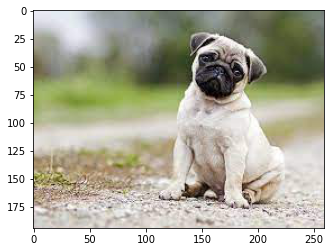

In [531]:
img = Image.open('dog1.jfif')
plt.imshow(img)
img = img.resize((32,32))
img1 = np.array(img)
img1 = np.reshape(img1,[-1, 32, 32, 3])
img1 = img1.astype('float')
img1 /= 255
d = {'ANN0':labels[np.argmax(ann0.predict(img1))],'ANN1':labels[np.argmax(ann1.predict(img1))],
   'ANN2':labels[np.argmax(ann2.predict(img1))],
  'CNN3':labels[np.argmax(cnn3.predict(img1))],'CNN4':labels[np.argmax(cnn4.predict(img1))],
   'CNN5':labels[np.argmax(cnn5.predict(img1))],
  'CNN6':labels[np.argmax(cnn6.predict(img1))],'CNN7':labels[np.argmax(cnn7.predict(img1))],
   'CNN8':labels[np.argmax(cnn8.predict(img1))],
  'CNN9':labels[np.argmax(cnn9.predict(img1))],'CNN10':labels[np.argmax(cnn10.predict(img1))]}
print(d)

1/1 [==============================] - 0s 14ms/step
{'ANN0': 'Ship', 'ANN1': 'Bird', 'ANN2': 'Cat', 'CNN3': 'Bird', 'CNN4': 'Dog', 'CNN5': 'Bird', 'CNN6': 'Cat', 'CNN7': 'Cat', 'CNN8': 'Deer', 'CNN9': 'Cat', 'CNN10': 'Bird'}


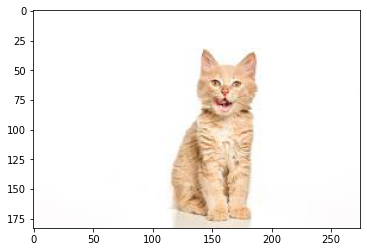

In [481]:
img=Image.open('cat3.jfif')
plt.imshow(img)
img=img.resize((32,32))
img1=np.array(img)
img1=np.reshape(img1,[-1, 32, 32, 3])
img1=img1.astype('float')
img1/=255
d={'ANN0':labels[np.argmax(ann0.predict(img1))],'ANN1':labels[np.argmax(ann1.predict(img1))],'ANN2':labels[np.argmax(ann2.predict(img1))],
  'CNN3':labels[np.argmax(cnn3.predict(img1))],'CNN4':labels[np.argmax(cnn4.predict(img1))],'CNN5':labels[np.argmax(cnn5.predict(img1))],
  'CNN6':labels[np.argmax(cnn6.predict(img1))],'CNN7':labels[np.argmax(cnn7.predict(img1))],'CNN8':labels[np.argmax(cnn8.predict(img1))],
  'CNN9':labels[np.argmax(cnn9.predict(img1))],'CNN10':labels[np.argmax(cnn10.predict(img1))]}
print(d)

1/1 [==============================] - 0s 14ms/step
{'ANN0': 'Airplane', 'ANN1': 'Airplane', 'ANN2': 'Airplane', 'CNN3': 'Airplane', 'CNN4': 'Airplane', 'CNN5': 'Airplane', 'CNN6': 'Airplane', 'CNN7': 'Airplane', 'CNN8': 'Airplane', 'CNN9': 'Airplane', 'CNN10': 'Airplane'}


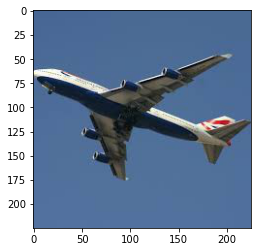

In [482]:
img=Image.open('plane2.jfif')
plt.imshow(img)
img=img.resize((32,32))
img1=np.array(img)
img1=np.reshape(img1,[-1, 32, 32, 3])
img1=img1.astype('float')
img1/=255
d={'ANN0':labels[np.argmax(ann0.predict(img1))],'ANN1':labels[np.argmax(ann1.predict(img1))],'ANN2':labels[np.argmax(ann2.predict(img1))],
  'CNN3':labels[np.argmax(cnn3.predict(img1))],'CNN4':labels[np.argmax(cnn4.predict(img1))],'CNN5':labels[np.argmax(cnn5.predict(img1))],
  'CNN6':labels[np.argmax(cnn6.predict(img1))],'CNN7':labels[np.argmax(cnn7.predict(img1))],'CNN8':labels[np.argmax(cnn8.predict(img1))],
  'CNN9':labels[np.argmax(cnn9.predict(img1))],'CNN10':labels[np.argmax(cnn10.predict(img1))]}
print(d)

1/1 [==============================] - 0s 14ms/step
{'ANN0': 'Automobile', 'ANN1': 'Airplane', 'ANN2': 'Automobile', 'CNN3': 'Automobile', 'CNN4': 'Airplane', 'CNN5': 'Automobile', 'CNN6': 'Automobile', 'CNN7': 'Airplane', 'CNN8': 'Automobile', 'CNN9': 'Automobile', 'CNN10': 'Airplane'}


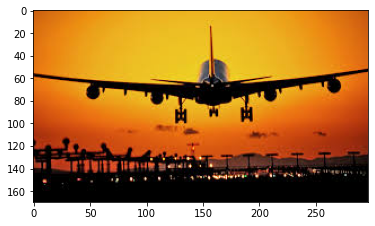

In [483]:
img=Image.open('plane3.jfif')
plt.imshow(img)
img=img.resize((32,32))
img1=np.array(img)
img1=np.reshape(img1,[-1, 32, 32, 3])
img1=img1.astype('float')
img1/=255
d={'ANN0':labels[np.argmax(ann0.predict(img1))],'ANN1':labels[np.argmax(ann1.predict(img1))],'ANN2':labels[np.argmax(ann2.predict(img1))],
  'CNN3':labels[np.argmax(cnn3.predict(img1))],'CNN4':labels[np.argmax(cnn4.predict(img1))],'CNN5':labels[np.argmax(cnn5.predict(img1))],
  'CNN6':labels[np.argmax(cnn6.predict(img1))],'CNN7':labels[np.argmax(cnn7.predict(img1))],'CNN8':labels[np.argmax(cnn8.predict(img1))],
  'CNN9':labels[np.argmax(cnn9.predict(img1))],'CNN10':labels[np.argmax(cnn10.predict(img1))]}
print(d)

1/1 [==============================] - 0s 14ms/step
{'ANN0': 'Deer', 'ANN1': 'Bird', 'ANN2': 'Deer', 'CNN3': 'Deer', 'CNN4': 'Deer', 'CNN5': 'Deer', 'CNN6': 'Deer', 'CNN7': 'Deer', 'CNN8': 'Deer', 'CNN9': 'Deer', 'CNN10': 'Deer'}


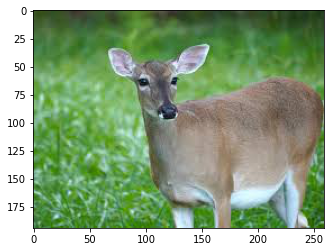

In [484]:
img=Image.open('deer1.jfif')
plt.imshow(img)
img=img.resize((32,32))
img1=np.array(img)
img1=np.reshape(img1,[-1, 32, 32, 3])
img1=img1.astype('float')
img1/=255
d={'ANN0':labels[np.argmax(ann0.predict(img1))],'ANN1':labels[np.argmax(ann1.predict(img1))],'ANN2':labels[np.argmax(ann2.predict(img1))],
  'CNN3':labels[np.argmax(cnn3.predict(img1))],'CNN4':labels[np.argmax(cnn4.predict(img1))],'CNN5':labels[np.argmax(cnn5.predict(img1))],
  'CNN6':labels[np.argmax(cnn6.predict(img1))],'CNN7':labels[np.argmax(cnn7.predict(img1))],'CNN8':labels[np.argmax(cnn8.predict(img1))],
  'CNN9':labels[np.argmax(cnn9.predict(img1))],'CNN10':labels[np.argmax(cnn10.predict(img1))]}
print(d)

1/1 [==============================] - 0s 14ms/step
{'ANN0': 'Ship', 'ANN1': 'Ship', 'ANN2': 'Ship', 'CNN3': 'Ship', 'CNN4': 'Ship', 'CNN5': 'Ship', 'CNN6': 'Ship', 'CNN7': 'Ship', 'CNN8': 'Ship', 'CNN9': 'Ship', 'CNN10': 'Ship'}


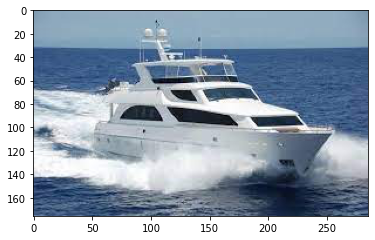

In [485]:
img=Image.open('boat1.jfif')
plt.imshow(img)
img=img.resize((32,32))
img1=np.array(img)
img1=np.reshape(img1,[-1, 32, 32, 3])
img1=img1.astype('float')
img1/=255
d={'ANN0':labels[np.argmax(ann0.predict(img1))],'ANN1':labels[np.argmax(ann1.predict(img1))],'ANN2':labels[np.argmax(ann2.predict(img1))],
  'CNN3':labels[np.argmax(cnn3.predict(img1))],'CNN4':labels[np.argmax(cnn4.predict(img1))],'CNN5':labels[np.argmax(cnn5.predict(img1))],
  'CNN6':labels[np.argmax(cnn6.predict(img1))],'CNN7':labels[np.argmax(cnn7.predict(img1))],'CNN8':labels[np.argmax(cnn8.predict(img1))],
  'CNN9':labels[np.argmax(cnn9.predict(img1))],'CNN10':labels[np.argmax(cnn10.predict(img1))]}
print(d)

1/1 [==============================] - 0s 15ms/step
{'ANN0': 'Ship', 'ANN1': 'Bird', 'ANN2': 'Cat', 'CNN3': 'Dog', 'CNN4': 'Dog', 'CNN5': 'Bird', 'CNN6': 'Horse', 'CNN7': 'Cat', 'CNN8': 'Cat', 'CNN9': 'Cat', 'CNN10': 'Dog'}


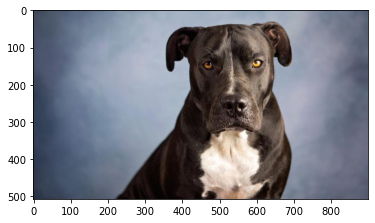

In [486]:
img=Image.open('dog2.jfif')
plt.imshow(img)
img=img.resize((32,32))
img1=np.array(img)
img1=np.reshape(img,[-1, 32, 32, 3])
img1=img1.astype('float')
img1/=255
d={'ANN0':labels[np.argmax(ann0.predict(img1))],'ANN1':labels[np.argmax(ann1.predict(img1))],'ANN2':labels[np.argmax(ann2.predict(img1))],
  'CNN3':labels[np.argmax(cnn3.predict(img1))],'CNN4':labels[np.argmax(cnn4.predict(img1))],'CNN5':labels[np.argmax(cnn5.predict(img1))],
  'CNN6':labels[np.argmax(cnn6.predict(img1))],'CNN7':labels[np.argmax(cnn7.predict(img1))],'CNN8':labels[np.argmax(cnn8.predict(img1))],
  'CNN9':labels[np.argmax(cnn9.predict(img1))],'CNN10':labels[np.argmax(cnn10.predict(img1))]}
print(d)

1/1 [==============================] - 0s 15ms/step
{'ANN0': 'Dog', 'ANN1': 'Dog', 'ANN2': 'Dog', 'CNN3': 'Dog', 'CNN4': 'Dog', 'CNN5': 'Dog', 'CNN6': 'Dog', 'CNN7': 'Dog', 'CNN8': 'Dog', 'CNN9': 'Dog', 'CNN10': 'Dog'}


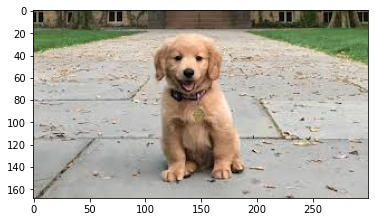

In [487]:
img=Image.open('dog3.jfif')
plt.imshow(img)
img=img.resize((32,32))
img1=np.array(img)
img1=np.reshape(img,[-1, 32, 32, 3])
img1=img1.astype('float')
img1/=255
d={'ANN0':labels[np.argmax(ann0.predict(img1))],'ANN1':labels[np.argmax(ann1.predict(img1))],'ANN2':labels[np.argmax(ann2.predict(img1))],
  'CNN3':labels[np.argmax(cnn3.predict(img1))],'CNN4':labels[np.argmax(cnn4.predict(img1))],'CNN5':labels[np.argmax(cnn5.predict(img1))],
  'CNN6':labels[np.argmax(cnn6.predict(img1))],'CNN7':labels[np.argmax(cnn7.predict(img1))],'CNN8':labels[np.argmax(cnn8.predict(img1))],
  'CNN9':labels[np.argmax(cnn9.predict(img1))],'CNN10':labels[np.argmax(cnn10.predict(img1))]}
print(d)

1/1 [==============================] - 0s 14ms/step
{'ANN0': 'Dog', 'ANN1': 'Dog', 'ANN2': 'Cat', 'CNN3': 'Cat', 'CNN4': 'Dog', 'CNN5': 'Bird', 'CNN6': 'Dog', 'CNN7': 'Dog', 'CNN8': 'Bird', 'CNN9': 'Dog', 'CNN10': 'Bird'}


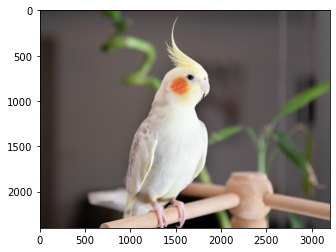

In [489]:
img=Image.open('bird1.jpg')
plt.imshow(img)
img=img.resize((32,32))
img1=np.array(img)
img1=np.reshape(img,[-1, 32, 32, 3])
img1=img1.astype('float')
img1/=255
d={'ANN0':labels[np.argmax(ann0.predict(img1))],'ANN1':labels[np.argmax(ann1.predict(img1))],'ANN2':labels[np.argmax(ann2.predict(img1))],
  'CNN3':labels[np.argmax(cnn3.predict(img1))],'CNN4':labels[np.argmax(cnn4.predict(img1))],'CNN5':labels[np.argmax(cnn5.predict(img1))],
  'CNN6':labels[np.argmax(cnn6.predict(img1))],'CNN7':labels[np.argmax(cnn7.predict(img1))],'CNN8':labels[np.argmax(cnn8.predict(img1))],
  'CNN9':labels[np.argmax(cnn9.predict(img1))],'CNN10':labels[np.argmax(cnn10.predict(img1))]}
print(d)

1/1 [==============================] - 0s 13ms/step
{'ANN0': 'Dog', 'ANN1': 'Bird', 'ANN2': 'Bird', 'CNN3': 'Bird', 'CNN4': 'Bird', 'CNN5': 'Bird', 'CNN6': 'Bird', 'CNN7': 'Bird', 'CNN8': 'Bird', 'CNN9': 'Bird', 'CNN10': 'Bird'}


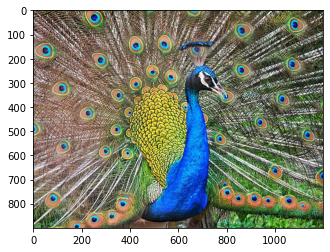

In [490]:
img=Image.open('peacock.jpg')
plt.imshow(img)
img=img.resize((32,32))
img1=np.array(img)
img1=np.reshape(img,[-1, 32, 32, 3])
img1=img1.astype('float')
img1/=255
d={'ANN0':labels[np.argmax(ann0.predict(img1))],'ANN1':labels[np.argmax(ann1.predict(img1))],'ANN2':labels[np.argmax(ann2.predict(img1))],
  'CNN3':labels[np.argmax(cnn3.predict(img1))],'CNN4':labels[np.argmax(cnn4.predict(img1))],'CNN5':labels[np.argmax(cnn5.predict(img1))],
  'CNN6':labels[np.argmax(cnn6.predict(img1))],'CNN7':labels[np.argmax(cnn7.predict(img1))],'CNN8':labels[np.argmax(cnn8.predict(img1))],
  'CNN9':labels[np.argmax(cnn9.predict(img1))],'CNN10':labels[np.argmax(cnn10.predict(img1))]}
print(d)

1/1 [==============================] - 0s 15ms/step
{'ANN0': 'Ship', 'ANN1': 'Airplane', 'ANN2': 'Airplane', 'CNN3': 'Airplane', 'CNN4': 'Airplane', 'CNN5': 'Airplane', 'CNN6': 'Airplane', 'CNN7': 'Airplane', 'CNN8': 'Airplane', 'CNN9': 'Airplane', 'CNN10': 'Airplane'}


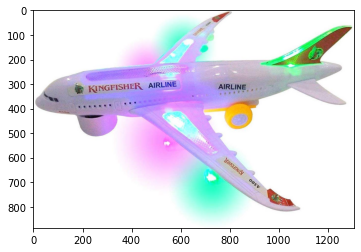

In [491]:
img=Image.open('plane4.jpg')
plt.imshow(img)
img=img.resize((32,32))
img1=np.array(img)
img1=np.reshape(img,[-1, 32, 32, 3])
img1=img1.astype('float')
img1/=255
d={'ANN0':labels[np.argmax(ann0.predict(img1))],'ANN1':labels[np.argmax(ann1.predict(img1))],'ANN2':labels[np.argmax(ann2.predict(img1))],
  'CNN3':labels[np.argmax(cnn3.predict(img1))],'CNN4':labels[np.argmax(cnn4.predict(img1))],'CNN5':labels[np.argmax(cnn5.predict(img1))],
  'CNN6':labels[np.argmax(cnn6.predict(img1))],'CNN7':labels[np.argmax(cnn7.predict(img1))],'CNN8':labels[np.argmax(cnn8.predict(img1))],
  'CNN9':labels[np.argmax(cnn9.predict(img1))],'CNN10':labels[np.argmax(cnn10.predict(img1))]}
print(d)

1/1 [==============================] - 0s 15ms/step
{'ANN0': 'Automobile', 'ANN1': 'Automobile', 'ANN2': 'Automobile', 'CNN3': 'Ship', 'CNN4': 'Airplane', 'CNN5': 'Automobile', 'CNN6': 'Automobile', 'CNN7': 'Automobile', 'CNN8': 'Automobile', 'CNN9': 'Automobile', 'CNN10': 'Automobile'}


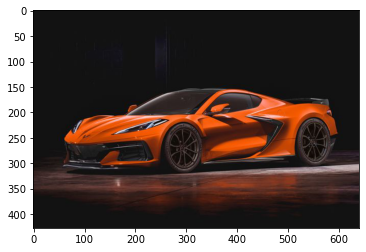

In [493]:
img=Image.open('car1.jpg')
plt.imshow(img)
img=img.resize((32,32))
img1=np.array(img)
img1=np.reshape(img,[-1, 32, 32, 3])
img1=img1.astype('float')
img1/=255
d={'ANN0':labels[np.argmax(ann0.predict(img1))],'ANN1':labels[np.argmax(ann1.predict(img1))],'ANN2':labels[np.argmax(ann2.predict(img1))],
  'CNN3':labels[np.argmax(cnn3.predict(img1))],'CNN4':labels[np.argmax(cnn4.predict(img1))],'CNN5':labels[np.argmax(cnn5.predict(img1))],
  'CNN6':labels[np.argmax(cnn6.predict(img1))],'CNN7':labels[np.argmax(cnn7.predict(img1))],'CNN8':labels[np.argmax(cnn8.predict(img1))],
  'CNN9':labels[np.argmax(cnn9.predict(img1))],'CNN10':labels[np.argmax(cnn10.predict(img1))]}
print(d)

1/1 [==============================] - 0s 16ms/step
{'ANN0': 'Automobile', 'ANN1': 'Automobile', 'ANN2': 'Automobile', 'CNN3': 'Automobile', 'CNN4': 'Automobile', 'CNN5': 'Automobile', 'CNN6': 'Automobile', 'CNN7': 'Automobile', 'CNN8': 'Automobile', 'CNN9': 'Automobile', 'CNN10': 'Automobile'}


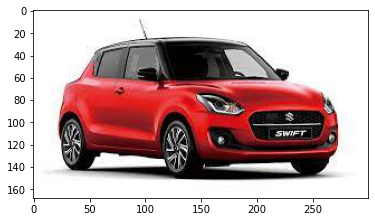

In [494]:
img=Image.open('car2.jfif')
plt.imshow(img)
img=img.resize((32,32))
img1=np.array(img)
img1=np.reshape(img,[-1, 32, 32, 3])
img1=img1.astype('float')
img1/=255
d={'ANN0':labels[np.argmax(ann0.predict(img1))],'ANN1':labels[np.argmax(ann1.predict(img1))],'ANN2':labels[np.argmax(ann2.predict(img1))],
  'CNN3':labels[np.argmax(cnn3.predict(img1))],'CNN4':labels[np.argmax(cnn4.predict(img1))],'CNN5':labels[np.argmax(cnn5.predict(img1))],
  'CNN6':labels[np.argmax(cnn6.predict(img1))],'CNN7':labels[np.argmax(cnn7.predict(img1))],'CNN8':labels[np.argmax(cnn8.predict(img1))],
  'CNN9':labels[np.argmax(cnn9.predict(img1))],'CNN10':labels[np.argmax(cnn10.predict(img1))]}
print(d)

In [517]:
pics=['dog1.jfif','cat1.jfif','plane2.jfif','plane3.jfif','deer1.jfif',
 'boat1.jfif','dog2.jfif','dog3.jfif','bird1.jpg',
 'peacock.jpg','plane4.jpg','car1.jpg','car2.jfif','cat4.jfif']
ids=['Dog','Cat','Airpane','Airplane','Deer','Ship','Dog','Dog','Bird','Bird','Airplane','Automobile','Automobile','Cat']
d1=dict(zip(pics,ids))
d1

{'dog1.jfif': 'Dog',
 'cat1.jfif': 'Cat',
 'plane2.jfif': 'Airpane',
 'plane3.jfif': 'Airplane',
 'deer1.jfif': 'Deer',
 'boat1.jfif': 'Ship',
 'dog2.jfif': 'Dog',
 'dog3.jfif': 'Dog',
 'bird1.jpg': 'Bird',
 'peacock.jpg': 'Bird',
 'plane4.jpg': 'Airplane',
 'car1.jpg': 'Automobile',
 'car2.jfif': 'Automobile',
 'cat4.jfif': 'Cat'}

1/1 [==============================] - 0s 16ms/step
{'ANN0': 'Dog', 'ANN1': 'Dog', 'ANN2': 'Cat', 'CNN3': 'Cat', 'CNN4': 'Cat', 'CNN5': 'Cat', 'CNN6': 'Dog', 'CNN7': 'Cat', 'CNN8': 'Dog', 'CNN9': 'Dog', 'CNN10': 'Cat'}


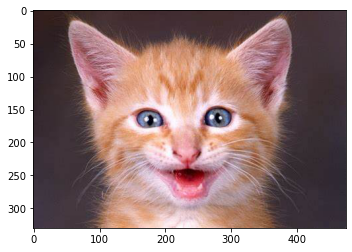

In [513]:
img=Image.open('cat4.jfif')
plt.imshow(img)
img=img.resize((32,32))
img1=np.array(img)
img1=np.reshape(img1,[-1, 32, 32, 3])
img1=img1.astype('float')
img1/=255
d={'ANN0':labels[np.argmax(ann0.predict(img1))],'ANN1':labels[np.argmax(ann1.predict(img1))],'ANN2':labels[np.argmax(ann2.predict(img1))],
  'CNN3':labels[np.argmax(cnn3.predict(img1))],'CNN4':labels[np.argmax(cnn4.predict(img1))],'CNN5':labels[np.argmax(cnn5.predict(img1))],
  'CNN6':labels[np.argmax(cnn6.predict(img1))],'CNN7':labels[np.argmax(cnn7.predict(img1))],'CNN8':labels[np.argmax(cnn8.predict(img1))],
  'CNN9':labels[np.argmax(cnn9.predict(img1))],'CNN10':labels[np.argmax(cnn10.predict(img1))]}
print(d)

# Getting Score of each Model

In [522]:
score=0
output={}
m=[ann0,ann1,ann2,cnn3,cnn4,cnn5,cnn6,cnn7,cnn8,cnn9,cnn10]
n=['ANN0','ANN1','ANN2','CNN3','CNN4','CNN5','CNN6','CNN7','CNN8','CNN9','CNN10']
for i,k in zip(m,n):
    score=0
    for j in d1.keys():
        img=Image.open(j)
        img=img.resize((32,32))
        img1=np.array(img)
        img1=np.reshape(img1,[-1, 32, 32, 3])
        img1=img1.astype('float')
        img1/=255
        pred=labels[np.argmax(i.predict(img1))]
        if pred==d1[j]:
            score+=1
    output[k]=score

1/1 [==============================] - 0s 15ms/step


## Model Scores for predicting 14 images 

In [528]:
output

{'ANN0': 6,
 'ANN1': 7,
 'ANN2': 9,
 'CNN3': 10,
 'CNN4': 11,
 'CNN5': 10,
 'CNN6': 9,
 'CNN7': 10,
 'CNN8': 10,
 'CNN9': 9,
 'CNN10': 12}

# Model Performance

### ANN0

1/1 [==============================] - 0s 16ms/step


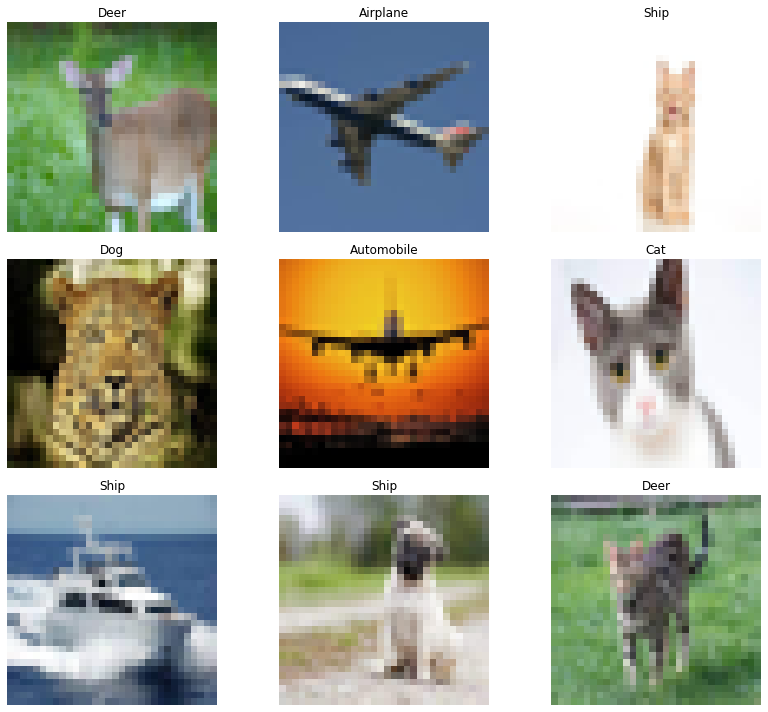

In [501]:
fig,((ax1, ax2, ax3),(ax4,ax5, ax6),(ax7, ax8,ax9)) = plt.subplots(3, 3, figsize=(12, 10))
ax = [ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8,ax9]
for i,j in zip(range(0,10),['deer1.jfif','plane2.jfif','cat3.jfif','lipord.jfif','plane3.jfif','cat1.jfif','boat1.jfif','dog1.jfif','cat2.jfif']):
    img=Image.open(j)
    img=img.resize((32,32))
    img1=np.array(img)
    img1=np.reshape(img,[-1, 32, 32, 3])
    img1=img1.astype('float')
    img1/=255
    name=labels[np.argmax(ann0.predict(img1))]
    ax[i].imshow(img)
    ax[i].set_title(name)
    ax[i].axis('off')
plt.tight_layout()
plt.show()

### ANN1

1/1 [==============================] - 0s 17ms/step


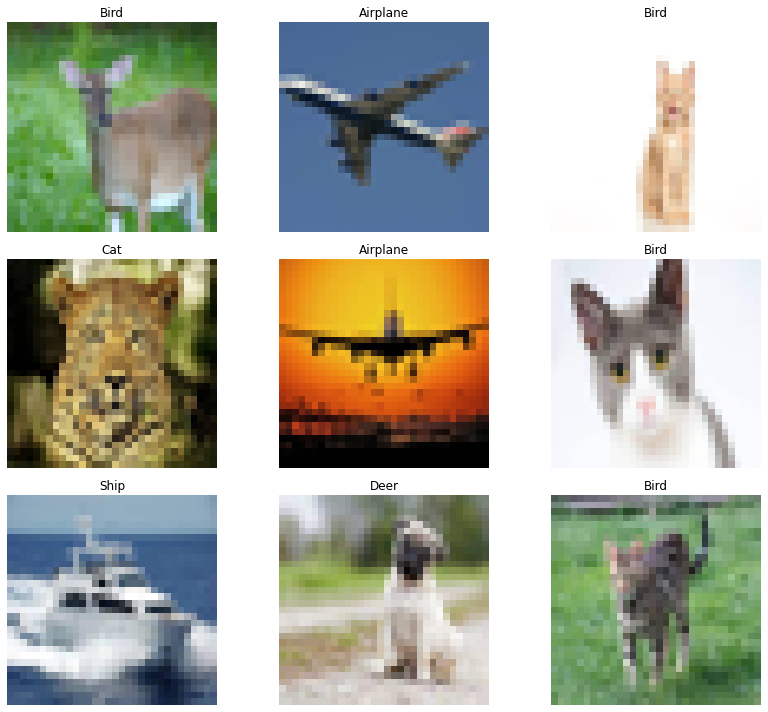

In [502]:
fig,((ax1, ax2, ax3),(ax4,ax5, ax6),(ax7, ax8,ax9)) = plt.subplots(3, 3, figsize=(12, 10))
ax = [ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8,ax9]
for i,j in zip(range(0,10),['deer1.jfif','plane2.jfif','cat3.jfif','lipord.jfif','plane3.jfif','cat1.jfif','boat1.jfif','dog1.jfif','cat2.jfif']):
    img=Image.open(j)
    img=img.resize((32,32))
    img1=np.array(img)
    img1=np.reshape(img,[-1, 32, 32, 3])
    img1=img1.astype('float')
    img1/=255
    name=labels[np.argmax(ann1.predict(img1))]
    ax[i].imshow(img)
    ax[i].set_title(name)
    ax[i].axis('off')
plt.tight_layout()
plt.show()

### ANN2

1/1 [==============================] - 0s 17ms/step


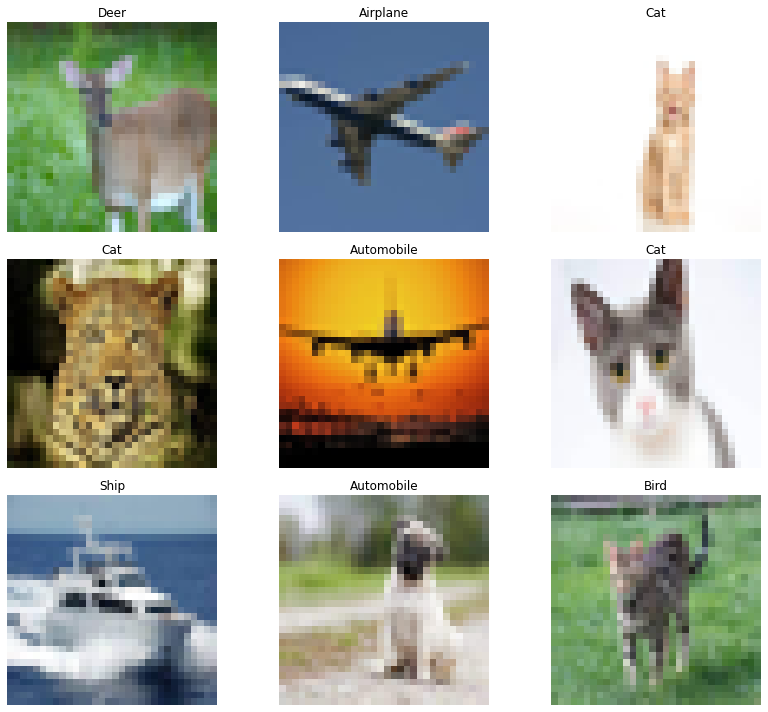

In [503]:
fig,((ax1, ax2, ax3),(ax4,ax5, ax6),(ax7, ax8,ax9)) = plt.subplots(3, 3, figsize=(12, 10))
ax = [ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8,ax9]
for i,j in zip(range(0,10),['deer1.jfif','plane2.jfif','cat3.jfif','lipord.jfif','plane3.jfif','cat1.jfif','boat1.jfif','dog1.jfif','cat2.jfif']):
    img=Image.open(j)
    img=img.resize((32,32))
    img1=np.array(img)
    img1=np.reshape(img1,[-1, 32, 32, 3])
    img1=img1.astype('float')
    img1/=255
    name=labels[np.argmax(ann2.predict(img1))]
    ax[i].imshow(img)
    ax[i].set_title(name)
    ax[i].axis('off')
plt.tight_layout()
plt.show()

### CNN3

1/1 [==============================] - 0s 22ms/step


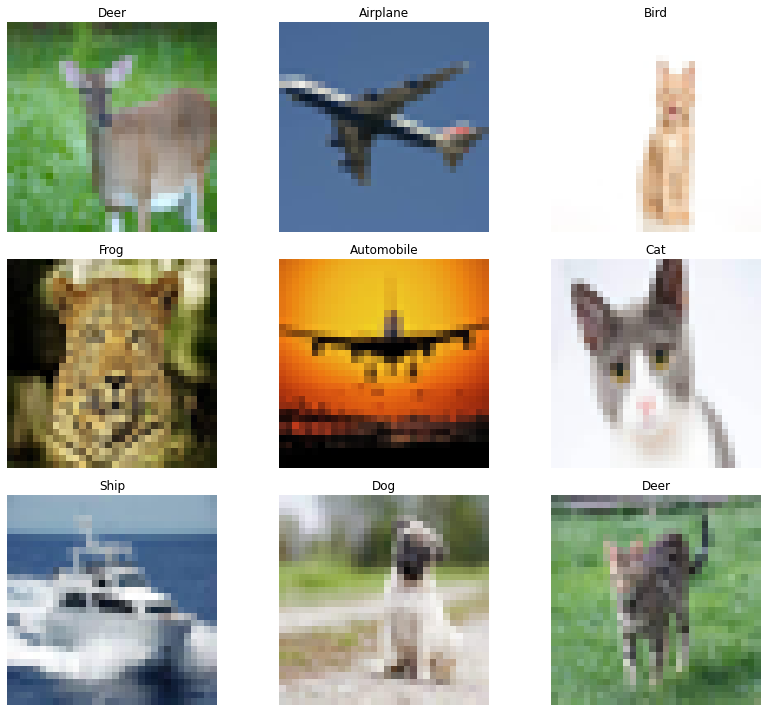

In [504]:
fig,((ax1, ax2, ax3),(ax4,ax5, ax6),(ax7, ax8,ax9)) = plt.subplots(3, 3, figsize=(12, 10))
ax = [ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8,ax9]
for i,j in zip(range(0,10),['deer1.jfif','plane2.jfif','cat3.jfif','lipord.jfif','plane3.jfif','cat1.jfif','boat1.jfif','dog1.jfif','cat2.jfif']):
    img=Image.open(j)
    img=img.resize((32,32))
    img1=np.array(img)
    img1=np.reshape(img,[-1, 32, 32, 3])
    img1=img1.astype('float')
    img1/=255
    name=labels[np.argmax(cnn3.predict(img1))]
    ax[i].imshow(img)
    ax[i].set_title(name)
    ax[i].axis('off')
plt.tight_layout()
plt.show()

### CNN4

1/1 [==============================] - 0s 16ms/step


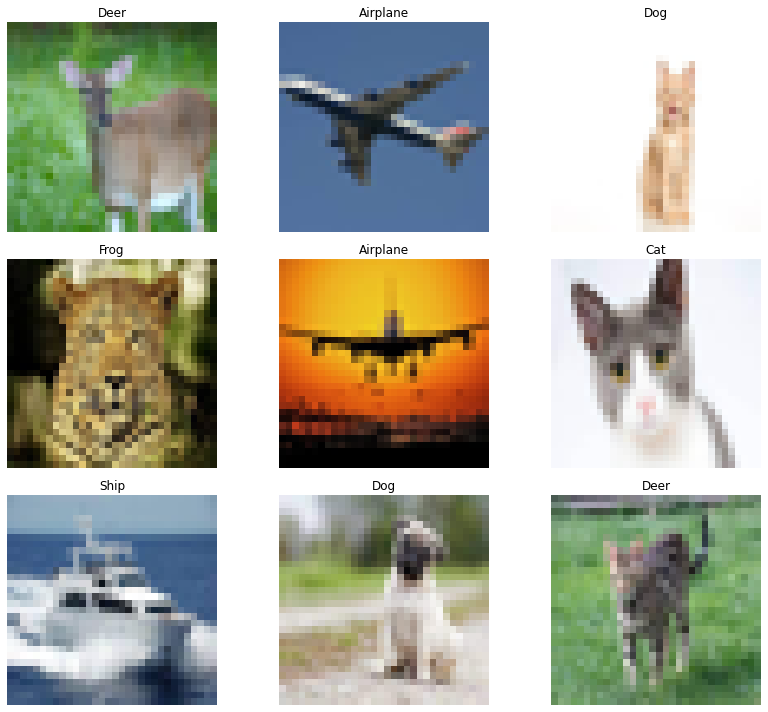

In [505]:

fig,((ax1, ax2, ax3),(ax4,ax5, ax6),(ax7, ax8,ax9)) = plt.subplots(3, 3, figsize=(12, 10))
ax = [ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8,ax9]
for i,j in zip(range(0,10),['deer1.jfif','plane2.jfif','cat3.jfif','lipord.jfif','plane3.jfif','cat1.jfif','boat1.jfif','dog1.jfif','cat2.jfif']):
    img=Image.open(j)
    img=img.resize((32,32))
    img1=np.array(img)
    img1=np.reshape(img,[-1, 32, 32, 3])
    img1=img1.astype('float')
    img1/=255
    name=labels[np.argmax(cnn4.predict(img1))]
    ax[i].imshow(img)
    ax[i].set_title(name)
    ax[i].axis('off')
plt.tight_layout()
plt.show()

### CNN5

1/1 [==============================] - 0s 15ms/step


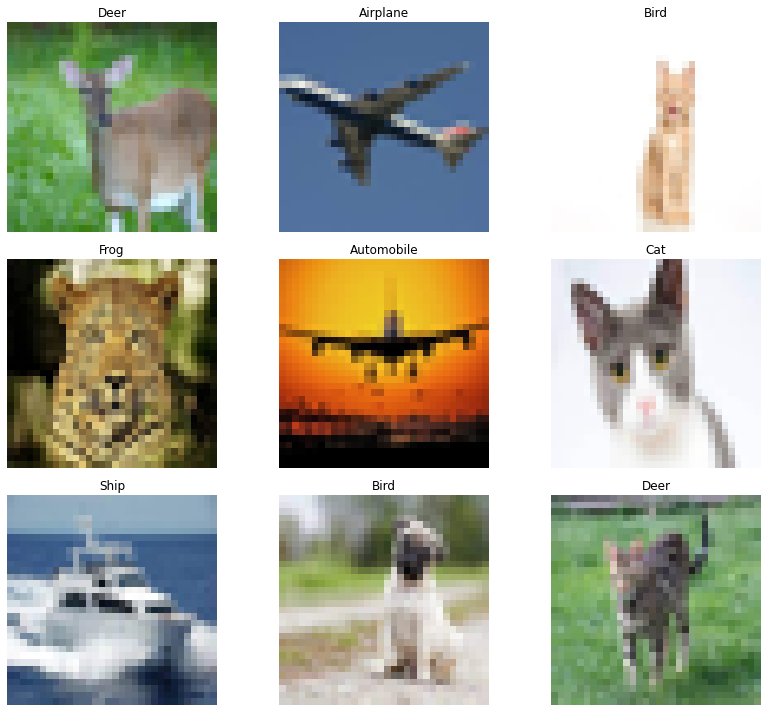

In [506]:

fig,((ax1, ax2, ax3),(ax4,ax5, ax6),(ax7, ax8,ax9)) = plt.subplots(3, 3, figsize=(12, 10))
ax = [ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8,ax9]
for i,j in zip(range(0,10),['deer1.jfif','plane2.jfif','cat3.jfif','lipord.jfif','plane3.jfif','cat1.jfif','boat1.jfif','dog1.jfif','cat2.jfif']):
    img=Image.open(j)
    img=img.resize((32,32))
    img1=np.array(img)
    img1=np.reshape(img,[-1, 32, 32, 3])
    img1=img1.astype('float')
    img1/=255
    name=labels[np.argmax(cnn5.predict(img1))]
    ax[i].imshow(img)
    ax[i].set_title(name)
    ax[i].axis('off')
plt.tight_layout()
plt.show()

### CNN6

1/1 [==============================] - 0s 14ms/step


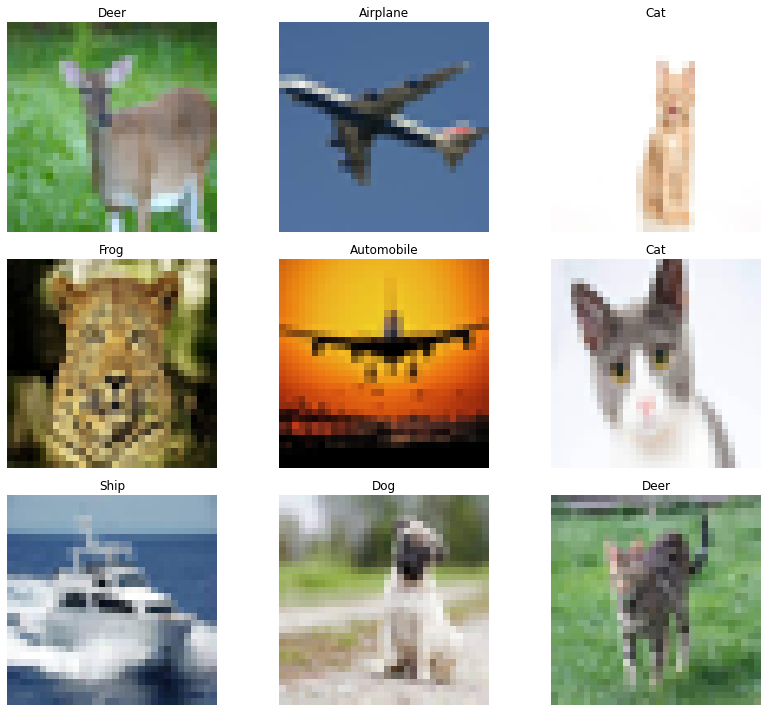

In [507]:

fig,((ax1, ax2, ax3),(ax4,ax5, ax6),(ax7, ax8,ax9)) = plt.subplots(3, 3, figsize=(12, 10))
ax = [ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8,ax9]
for i,j in zip(range(0,10),['deer1.jfif','plane2.jfif','cat3.jfif','lipord.jfif','plane3.jfif','cat1.jfif','boat1.jfif','dog1.jfif','cat2.jfif']):
    img=Image.open(j)
    img=img.resize((32,32))
    img1=np.array(img)
    img1=np.reshape(img,[-1, 32, 32, 3])
    img1=img1.astype('float')
    img1/=255
    name=labels[np.argmax(cnn6.predict(img1))]
    ax[i].imshow(img)
    ax[i].set_title(name)
    ax[i].axis('off')
plt.tight_layout()
plt.show()

### CNN7

1/1 [==============================] - 0s 14ms/step


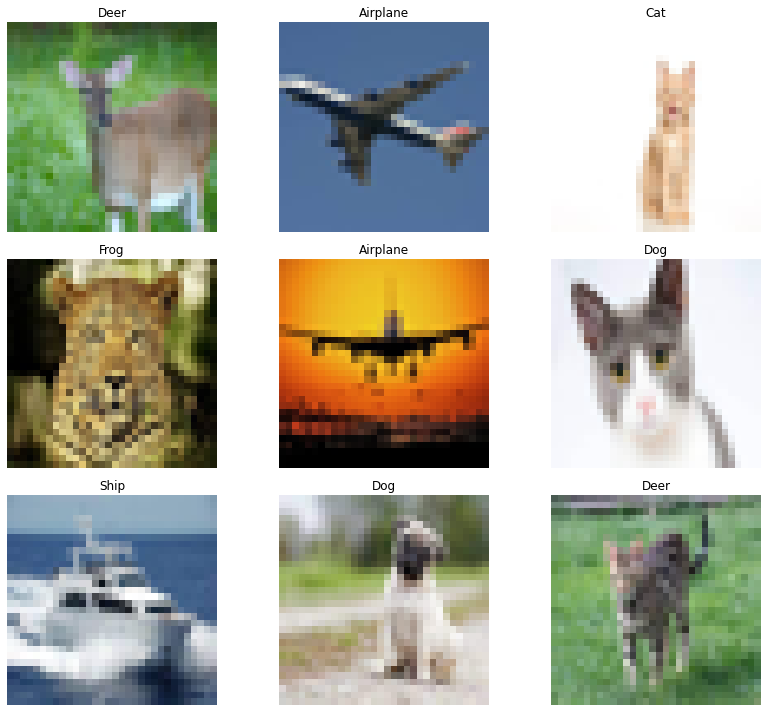

In [508]:

fig,((ax1, ax2, ax3),(ax4,ax5, ax6),(ax7, ax8,ax9)) = plt.subplots(3, 3, figsize=(12, 10))
ax = [ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8,ax9]
for i,j in zip(range(0,10),['deer1.jfif','plane2.jfif','cat3.jfif','lipord.jfif','plane3.jfif','cat1.jfif','boat1.jfif','dog1.jfif','cat2.jfif']):
    img=Image.open(j)
    img=img.resize((32,32))
    img1=np.array(img)
    img1=np.reshape(img,[-1, 32, 32, 3])
    img1=img1.astype('float')
    img1/=255
    name=labels[np.argmax(cnn7.predict(img1))]
    ax[i].imshow(img)
    ax[i].set_title(name)
    ax[i].axis('off')
plt.tight_layout()
plt.show()

### CNN8

1/1 [==============================] - 0s 13ms/step


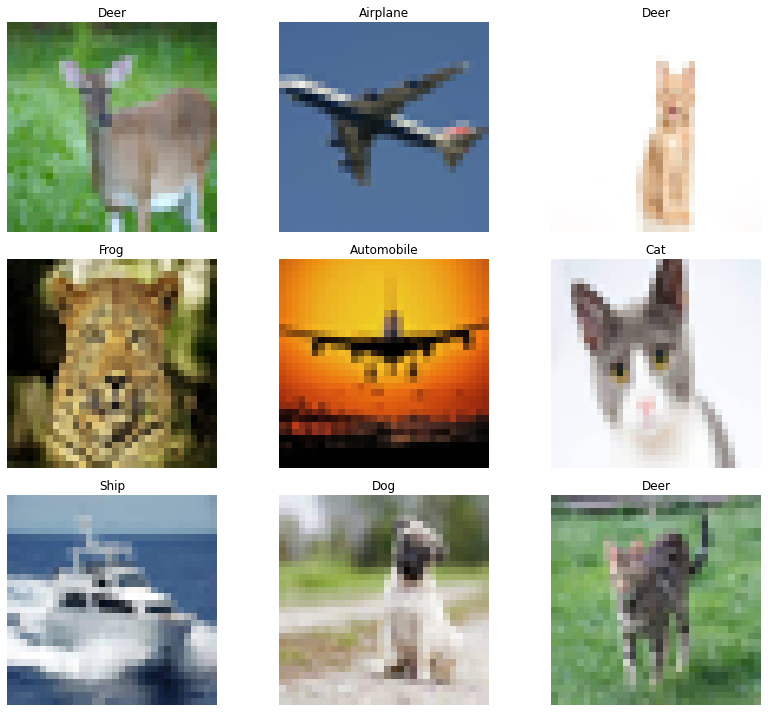

In [509]:

fig,((ax1, ax2, ax3),(ax4,ax5, ax6),(ax7, ax8,ax9)) = plt.subplots(3, 3, figsize=(12, 10))
ax = [ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8,ax9]
for i,j in zip(range(0,10),['deer1.jfif','plane2.jfif','cat3.jfif','lipord.jfif','plane3.jfif','cat1.jfif','boat1.jfif','dog1.jfif','cat2.jfif']):
    img=Image.open(j)
    img=img.resize((32,32))
    img1=np.array(img)
    img1=np.reshape(img,[-1, 32, 32, 3])
    img1=img1.astype('float')
    img1/=255
    name=labels[np.argmax(cnn8.predict(img1))]
    ax[i].imshow(img)
    ax[i].set_title(name)
    ax[i].axis('off')
plt.tight_layout()
plt.show()

### CNN9

1/1 [==============================] - 0s 14ms/step


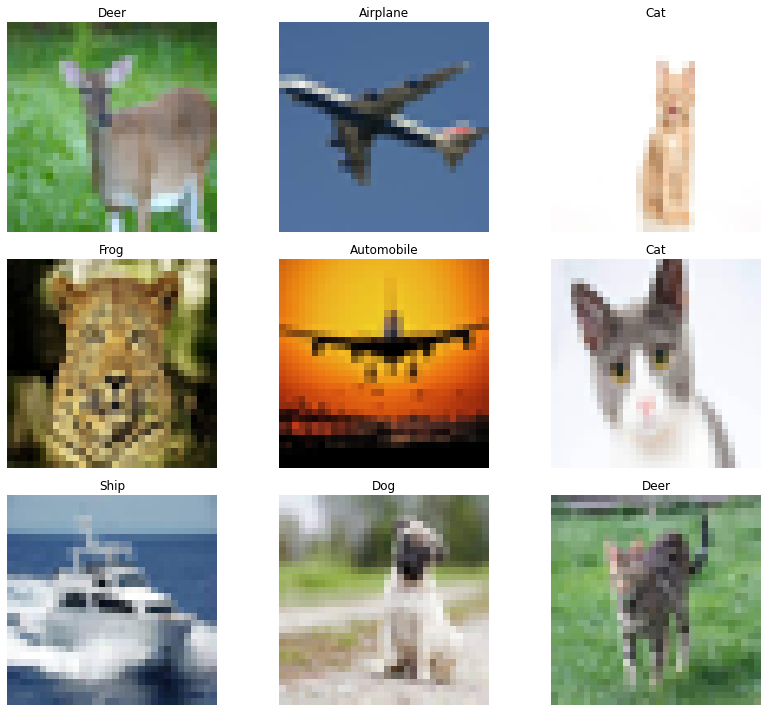

In [510]:

fig,((ax1, ax2, ax3),(ax4,ax5, ax6),(ax7, ax8,ax9)) = plt.subplots(3, 3, figsize=(12, 10))
ax = [ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8,ax9]
for i,j in zip(range(0,10),['deer1.jfif','plane2.jfif','cat3.jfif','lipord.jfif','plane3.jfif','cat1.jfif','boat1.jfif','dog1.jfif','cat2.jfif']):
    img=Image.open(j)
    img=img.resize((32,32))
    img1=np.array(img)
    img1=np.reshape(img,[-1, 32, 32, 3])
    img1=img1.astype('float')
    img1/=255
    name=labels[np.argmax(cnn9.predict(img1))]
    ax[i].imshow(img)
    ax[i].set_title(name)
    ax[i].axis('off')
plt.tight_layout()
plt.show()

### CNN10

1/1 [==============================] - 0s 14ms/step


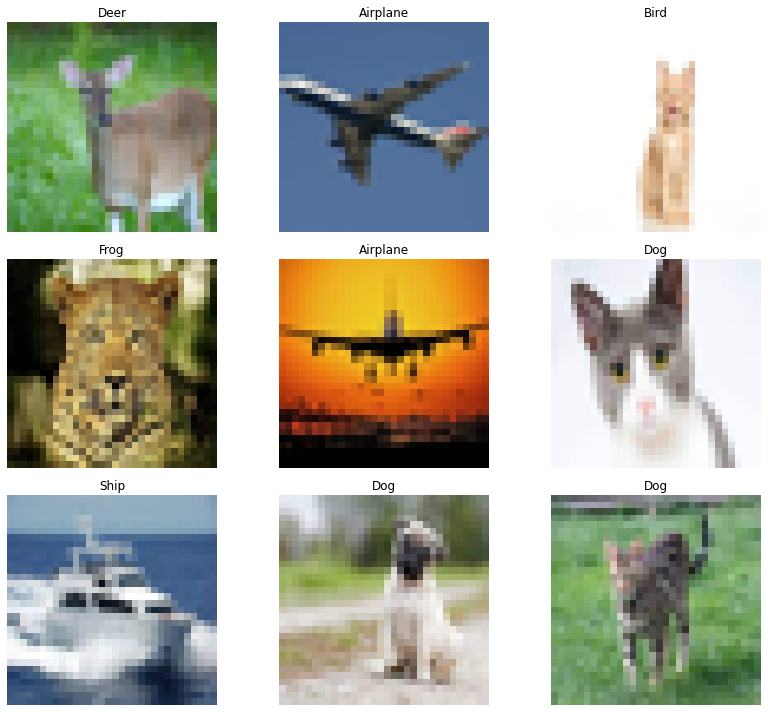

In [511]:
fig,((ax1, ax2, ax3),(ax4,ax5, ax6),(ax7, ax8,ax9)) = plt.subplots(3, 3, figsize=(12, 10))
ax = [ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8,ax9]
for i,j in zip(range(0,10),['deer1.jfif','plane2.jfif','cat3.jfif','lipord.jfif','plane3.jfif','cat1.jfif','boat1.jfif','dog1.jfif','cat2.jfif']):
    img=Image.open(j)
    img=img.resize((32,32))
    img1=np.array(img)
    img1=np.reshape(img,[-1, 32, 32, 3])
    img1=img1.astype('float')
    img1/=255
    name=labels[np.argmax(cnn10.predict(img1))]
    ax[i].imshow(img)
    ax[i].set_title(name)
    ax[i].axis('off')
plt.tight_layout()
plt.show()

## Random Testing

1/1 [==============================] - 0s 16ms/step
{'ANN0': 'Ship', 'ANN1': 'Ship', 'ANN2': 'Ship', 'CNN3': 'Ship', 'CNN4': 'Ship', 'CNN5': 'Ship', 'CNN6': 'Ship', 'CNN7': 'Ship', 'CNN8': 'Ship', 'CNN9': 'Ship', 'CNN10': 'Ship'}


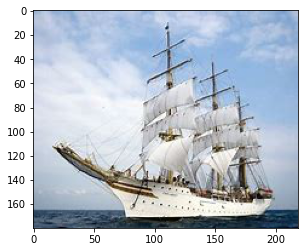

In [499]:
img=Image.open('ship 3.jfif')
plt.imshow(img)
img=img.resize((32,32))
img1=np.array(img)
img1=np.reshape(img,[-1, 32, 32, 3])
img1=img1.astype('float')
img1/=255
d={'ANN0':labels[np.argmax(ann0.predict(img1))],'ANN1':labels[np.argmax(ann1.predict(img1))],'ANN2':labels[np.argmax(ann2.predict(img1))],
  'CNN3':labels[np.argmax(cnn3.predict(img1))],'CNN4':labels[np.argmax(cnn4.predict(img1))],'CNN5':labels[np.argmax(cnn5.predict(img1))],
  'CNN6':labels[np.argmax(cnn6.predict(img1))],'CNN7':labels[np.argmax(cnn7.predict(img1))],'CNN8':labels[np.argmax(cnn8.predict(img1))],
  'CNN9':labels[np.argmax(cnn9.predict(img1))],'CNN10':labels[np.argmax(cnn10.predict(img1))]}
print(d)

1/1 [==============================] - 0s 16ms/step
{'ANN0': 'Ship', 'ANN1': 'Ship', 'ANN2': 'Ship', 'CNN3': 'Ship', 'CNN4': 'Ship', 'CNN5': 'Ship', 'CNN6': 'Ship', 'CNN7': 'Ship', 'CNN8': 'Ship', 'CNN9': 'Ship', 'CNN10': 'Ship'}


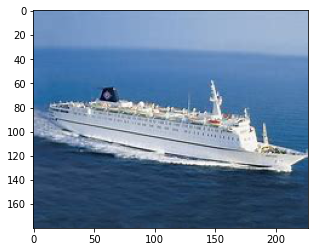

In [500]:
img=Image.open('ship4.jfif')
plt.imshow(img)
img=img.resize((32,32))
img1=np.array(img)
img1=np.reshape(img,[-1, 32, 32, 3])
img1=img1.astype('float')
img1/=255
d={'ANN0':labels[np.argmax(ann0.predict(img1))],'ANN1':labels[np.argmax(ann1.predict(img1))],'ANN2':labels[np.argmax(ann2.predict(img1))],
  'CNN3':labels[np.argmax(cnn3.predict(img1))],'CNN4':labels[np.argmax(cnn4.predict(img1))],'CNN5':labels[np.argmax(cnn5.predict(img1))],
  'CNN6':labels[np.argmax(cnn6.predict(img1))],'CNN7':labels[np.argmax(cnn7.predict(img1))],'CNN8':labels[np.argmax(cnn8.predict(img1))],
  'CNN9':labels[np.argmax(cnn9.predict(img1))],'CNN10':labels[np.argmax(cnn10.predict(img1))]}
print(d)

1/1 [==============================] - 0s 14ms/step
{'ANN0': 'Ship', 'ANN1': 'Automobile', 'ANN2': 'Ship', 'CNN3': 'Ship', 'CNN4': 'Airplane', 'CNN5': 'Ship', 'CNN6': 'Ship', 'CNN7': 'Airplane', 'CNN8': 'Airplane', 'CNN9': 'Airplane', 'CNN10': 'Airplane'}


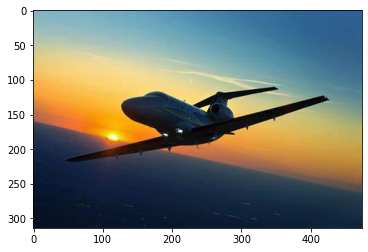

In [495]:
img=Image.open('plane6.jfif')
plt.imshow(img)
img=img.resize((32,32))
img1=np.array(img)
img1=np.reshape(img,[-1, 32, 32, 3])
img1=img1.astype('float')
img1/=255
d={'ANN0':labels[np.argmax(ann0.predict(img1))],'ANN1':labels[np.argmax(ann1.predict(img1))],'ANN2':labels[np.argmax(ann2.predict(img1))],
  'CNN3':labels[np.argmax(cnn3.predict(img1))],'CNN4':labels[np.argmax(cnn4.predict(img1))],'CNN5':labels[np.argmax(cnn5.predict(img1))],
  'CNN6':labels[np.argmax(cnn6.predict(img1))],'CNN7':labels[np.argmax(cnn7.predict(img1))],'CNN8':labels[np.argmax(cnn8.predict(img1))],
  'CNN9':labels[np.argmax(cnn9.predict(img1))],'CNN10':labels[np.argmax(cnn10.predict(img1))]}
print(d)

1/1 [==============================] - 0s 17ms/step
{'ANN0': 'Ship', 'ANN1': 'Airplane', 'ANN2': 'Airplane', 'CNN3': 'Airplane', 'CNN4': 'Airplane', 'CNN5': 'Airplane', 'CNN6': 'Airplane', 'CNN7': 'Airplane', 'CNN8': 'Airplane', 'CNN9': 'Airplane', 'CNN10': 'Airplane'}


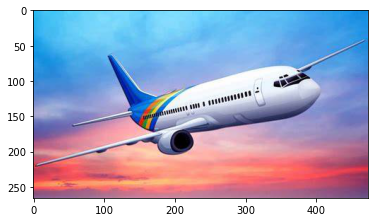

In [496]:
img=Image.open('plane7.jfif')
plt.imshow(img)
img=img.resize((32,32))
img1=np.array(img)
img1=np.reshape(img,[-1, 32, 32, 3])
img1=img1.astype('float')
img1/=255
d={'ANN0':labels[np.argmax(ann0.predict(img1))],'ANN1':labels[np.argmax(ann1.predict(img1))],'ANN2':labels[np.argmax(ann2.predict(img1))],
  'CNN3':labels[np.argmax(cnn3.predict(img1))],'CNN4':labels[np.argmax(cnn4.predict(img1))],'CNN5':labels[np.argmax(cnn5.predict(img1))],
  'CNN6':labels[np.argmax(cnn6.predict(img1))],'CNN7':labels[np.argmax(cnn7.predict(img1))],'CNN8':labels[np.argmax(cnn8.predict(img1))],
  'CNN9':labels[np.argmax(cnn9.predict(img1))],'CNN10':labels[np.argmax(cnn10.predict(img1))]}
print(d)

1/1 [==============================] - 0s 16ms/step
{'ANN0': 'Dog', 'ANN1': 'Frog', 'ANN2': 'Cat', 'CNN3': 'Dog', 'CNN4': 'Cat', 'CNN5': 'Dog', 'CNN6': 'Dog', 'CNN7': 'Dog', 'CNN8': 'Dog', 'CNN9': 'Dog', 'CNN10': 'Dog'}


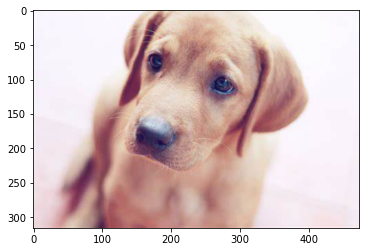

In [497]:
img=Image.open('dog6.jfif')
plt.imshow(img)
img=img.resize((32,32))
img1=np.array(img)
img1=np.reshape(img,[-1, 32, 32, 3])
img1=img1.astype('float')
img1/=255
d={'ANN0':labels[np.argmax(ann0.predict(img1))],'ANN1':labels[np.argmax(ann1.predict(img1))],'ANN2':labels[np.argmax(ann2.predict(img1))],
  'CNN3':labels[np.argmax(cnn3.predict(img1))],'CNN4':labels[np.argmax(cnn4.predict(img1))],'CNN5':labels[np.argmax(cnn5.predict(img1))],
  'CNN6':labels[np.argmax(cnn6.predict(img1))],'CNN7':labels[np.argmax(cnn7.predict(img1))],'CNN8':labels[np.argmax(cnn8.predict(img1))],
  'CNN9':labels[np.argmax(cnn9.predict(img1))],'CNN10':labels[np.argmax(cnn10.predict(img1))]}
print(d)

1/1 [==============================] - 0s 14ms/step
{'ANN0': 'Ship', 'ANN1': 'Truck', 'ANN2': 'Automobile', 'CNN3': 'Truck', 'CNN4': 'Truck', 'CNN5': 'Truck', 'CNN6': 'Truck', 'CNN7': 'Truck', 'CNN8': 'Truck', 'CNN9': 'Airplane', 'CNN10': 'Truck'}


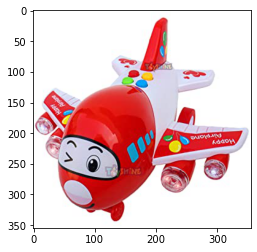

In [492]:
img=Image.open('plane5.jpg')
plt.imshow(img)
img=img.resize((32,32))
img1=np.array(img)
img1=np.reshape(img,[-1, 32, 32, 3])
img1=img1.astype('float')
img1/=255
d={'ANN0':labels[np.argmax(ann0.predict(img1))],'ANN1':labels[np.argmax(ann1.predict(img1))],'ANN2':labels[np.argmax(ann2.predict(img1))],
  'CNN3':labels[np.argmax(cnn3.predict(img1))],'CNN4':labels[np.argmax(cnn4.predict(img1))],'CNN5':labels[np.argmax(cnn5.predict(img1))],
  'CNN6':labels[np.argmax(cnn6.predict(img1))],'CNN7':labels[np.argmax(cnn7.predict(img1))],'CNN8':labels[np.argmax(cnn8.predict(img1))],
  'CNN9':labels[np.argmax(cnn9.predict(img1))],'CNN10':labels[np.argmax(cnn10.predict(img1))]}
print(d)

1/1 [==============================] - 0s 14ms/step
{'ANN0': 'Ship', 'ANN1': 'Ship', 'ANN2': 'Ship', 'CNN3': 'Ship', 'CNN4': 'Ship', 'CNN5': 'Ship', 'CNN6': 'Truck', 'CNN7': 'Ship', 'CNN8': 'Ship', 'CNN9': 'Ship', 'CNN10': 'Ship'}


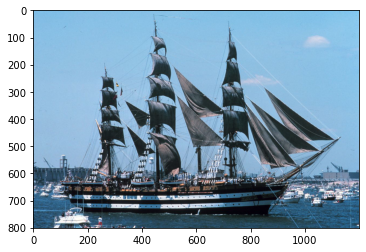

In [488]:
img=Image.open('ship2.jpg')
plt.imshow(img)
img=img.resize((32,32))
img1=np.array(img)
img1=np.reshape(img,[-1, 32, 32, 3])
img1=img1.astype('float')
img1/=255
d={'ANN0':labels[np.argmax(ann0.predict(img1))],'ANN1':labels[np.argmax(ann1.predict(img1))],'ANN2':labels[np.argmax(ann2.predict(img1))],
  'CNN3':labels[np.argmax(cnn3.predict(img1))],'CNN4':labels[np.argmax(cnn4.predict(img1))],'CNN5':labels[np.argmax(cnn5.predict(img1))],
  'CNN6':labels[np.argmax(cnn6.predict(img1))],'CNN7':labels[np.argmax(cnn7.predict(img1))],'CNN8':labels[np.argmax(cnn8.predict(img1))],
  'CNN9':labels[np.argmax(cnn9.predict(img1))],'CNN10':labels[np.argmax(cnn10.predict(img1))]}
print(d)

1/1 [==============================] - 0s 14ms/step
{'ANN0': 'Cat', 'ANN1': 'Bird', 'ANN2': 'Cat', 'CNN3': 'Cat', 'CNN4': 'Cat', 'CNN5': 'Cat', 'CNN6': 'Cat', 'CNN7': 'Dog', 'CNN8': 'Cat', 'CNN9': 'Cat', 'CNN10': 'Dog'}


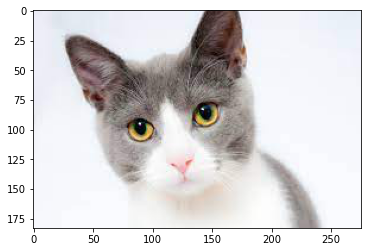

In [479]:
img=Image.open('cat1.jfif')
plt.imshow(img)
img=img.resize((32,32))
img1=np.array(img)
img1=np.reshape(img1,[-1, 32, 32, 3])
img1=img1.astype('float')
img1/=255
d={'ANN0':labels[np.argmax(ann0.predict(img1))],'ANN1':labels[np.argmax(ann1.predict(img1))],'ANN2':labels[np.argmax(ann2.predict(img1))],
  'CNN3':labels[np.argmax(cnn3.predict(img1))],'CNN4':labels[np.argmax(cnn4.predict(img1))],'CNN5':labels[np.argmax(cnn5.predict(img1))],
  'CNN6':labels[np.argmax(cnn6.predict(img1))],'CNN7':labels[np.argmax(cnn7.predict(img1))],'CNN8':labels[np.argmax(cnn8.predict(img1))],
  'CNN9':labels[np.argmax(cnn9.predict(img1))],'CNN10':labels[np.argmax(cnn10.predict(img1))]}
print(d)

1/1 [==============================] - 0s 14ms/step
{'ANN0': 'Deer', 'ANN1': 'Bird', 'ANN2': 'Bird', 'CNN3': 'Deer', 'CNN4': 'Deer', 'CNN5': 'Deer', 'CNN6': 'Deer', 'CNN7': 'Deer', 'CNN8': 'Deer', 'CNN9': 'Deer', 'CNN10': 'Dog'}


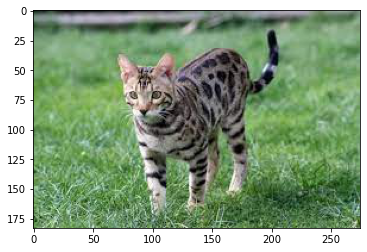

In [480]:
img=Image.open('cat2.jfif')
plt.imshow(img)
img=img.resize((32,32))
img1=np.array(img)
img1=np.reshape(img1,[-1, 32, 32, 3])
img1=img1.astype('float')
img1/=255
d={'ANN0':labels[np.argmax(ann0.predict(img1))],'ANN1':labels[np.argmax(ann1.predict(img1))],'ANN2':labels[np.argmax(ann2.predict(img1))],
  'CNN3':labels[np.argmax(cnn3.predict(img1))],'CNN4':labels[np.argmax(cnn4.predict(img1))],'CNN5':labels[np.argmax(cnn5.predict(img1))],
  'CNN6':labels[np.argmax(cnn6.predict(img1))],'CNN7':labels[np.argmax(cnn7.predict(img1))],'CNN8':labels[np.argmax(cnn8.predict(img1))],
  'CNN9':labels[np.argmax(cnn9.predict(img1))],'CNN10':labels[np.argmax(cnn10.predict(img1))]}
print(d)